# **Import thư viện**

In [147]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})


In [148]:
# !pip3 uninstall statsmodels
# !pip3 install numpy scipy patsy pandas
# !pip3 install statsmodels

In [149]:
# from statsmodels.tsa.ardl import ardl_select_order
# from statsmodels.tsa.api import ARDL
# from statsmodels.tsa.api import UECM

# **Import dataset**

**Upload dataset từ file Google Drive**

*Lưu ý: nhớ mở quyền truy cập cho BẤT KỲ AI VỚI ĐƯỜNG LIÊN KẾT*

In [150]:
!gdown 1lX9QMg5kVev-DwiQ-sZdQu9Lul3Sv4oI

Downloading...
From: https://drive.google.com/uc?id=1lX9QMg5kVev-DwiQ-sZdQu9Lul3Sv4oI
To: /content/raw_pricewithoutvolume.xlsx
100% 315k/315k [00:00<00:00, 62.1MB/s]


Data ngân hàng đã được lọc các cột liên quan đến khối lượng giao dịch (volume)

**Đọc Dataset vừa upload** 

In [151]:
data = pd.read_excel("raw_pricewithoutvolume.xlsx")
data

Unnamed: 0       ACB.HM       BAB.HN       BID.HM       CTG.HM  \
0               Timestamp  Trade Close  Trade Close  Trade Close  Trade Close   
1     2022-08-22 00:00:00        24650        17100        38450        28000   
2     2022-08-19 00:00:00        24850        17300        39350        28250   
3     2022-08-18 00:00:00        25150        17400        39600        28750   
4     2022-08-17 00:00:00        24950        16700        40000        29100   
...                   ...          ...          ...          ...          ...   
2651  2012-01-09 00:00:00  4657.153246          NaN          NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083          NaN          NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892          NaN          NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571          NaN          NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906          NaN          NaN  6953.034324   

            EIB.HM       HDB.HM       LPB.HM       MBB.HM       MSB.HM  \
0      Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1            29900        25450        15500        23100        19000   
2            29700        26250        15550   22999.9908        19250   
3            29900        26800        15650  23041.65745        19300   
4            30000        26750        15850  23124.99075        19300   
...            ...          ...          ...          ...          ...   
2651  11276.220749          NaN          NaN  2540.534083          NaN   
2652  11276.220749          NaN          NaN  2517.010619          NaN   
2653  11197.913661          NaN          NaN  2517.010619          NaN   
2654  11354.527838          NaN          NaN  2564.057546          NaN   
2655  11197.913661          NaN          NaN  2564.057546          NaN   

           NVB.HN       OCB.HM       SHB.HM       SSB.HM        STB.HM  \
0     Trade Close  Trade Close  Trade Close  Trade Close   Trade Close   
1           26500        17450        15550        32500         24700   
2           26000        17950        15450        31250         25100   
3           27800        17950        15500        31350         25200   
4           27700        18200        15600        31500         25400   
...           ...          ...          ...          ...           ...   
2651     6390.448          NaN  2033.402392          NaN  10297.390995   
2652     5991.045          NaN  2033.402392          NaN   9807.039043   
2653     5991.045          NaN  2033.402392          NaN   9684.451055   
2654    6310.5674          NaN  2069.076118          NaN   9807.039043   
2655     6390.448          NaN  2104.749844          NaN   9500.569073   

           TCB.HM       TPB.HM       VCB.HM       VIB.HM       VPB.HM  
0     Trade Close  Trade Close  Trade Close  Trade Close  Trade Close  
1           38700        27900        80000        25000        31250  
2           39000        28400        80900        25700        31250  
3           39100        28700        81500        26000        30050  
4           39300        28700        81500        26150        30150  
...           ...          ...          ...          ...          ...  
2651          NaN          NaN  8293.820423          NaN          NaN  
2652          NaN          NaN  8049.884528          NaN          NaN  
2653          NaN          NaN  8212.508458          NaN          NaN  
2654          NaN          NaN  8253.164441          NaN          NaN  
2655          NaN          NaN  8456.444353          NaN          NaN  

[2656 rows x 20 columns]

#**Data Preparation**

#### **Lấy 5 dòng đầu tiên và cuối cùng của bộ dữ liệu** 

In [152]:
data.head()

Unnamed: 0       ACB.HM       BAB.HN       BID.HM       CTG.HM  \
0            Timestamp  Trade Close  Trade Close  Trade Close  Trade Close   
1  2022-08-22 00:00:00        24650        17100        38450        28000   
2  2022-08-19 00:00:00        24850        17300        39350        28250   
3  2022-08-18 00:00:00        25150        17400        39600        28750   
4  2022-08-17 00:00:00        24950        16700        40000        29100   

        EIB.HM       HDB.HM       LPB.HM       MBB.HM       MSB.HM  \
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1        29900        25450        15500        23100        19000   
2        29700        26250        15550   22999.9908        19250   
3        29900        26800        15650  23041.65745        19300   
4        30000        26750        15850  23124.99075        19300   

        NVB.HN       OCB.HM       SHB.HM       SSB.HM       STB.HM  \
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1        26500        17450        15550        32500        24700   
2        26000        17950        15450        31250        25100   
3        27800        17950        15500        31350        25200   
4        27700        18200        15600        31500        25400   

        TCB.HM       TPB.HM       VCB.HM       VIB.HM       VPB.HM  
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close  
1        38700        27900        80000        25000        31250  
2        39000        28400        80900        25700        31250  
3        39100        28700        81500        26000        30050  
4        39300        28700        81500        26150        30150

In [153]:
data.tail(5)

Unnamed: 0       ACB.HM BAB.HN BID.HM       CTG.HM  \
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN

#### **Xóa dòng đầu tiên chứa Trade Close**

In [154]:
data.drop(0, inplace=True)

In [155]:
data

Unnamed: 0       ACB.HM BAB.HN BID.HM       CTG.HM  \
1     2022-08-22 00:00:00        24650  17100  38450        28000   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
...                   ...          ...    ...    ...          ...   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
1            29900  25450  15500        23100  19000      26500  17450   
2            29700  26250  15550   22999.9908  19250      26000  17950   
3            29900  26800  15650  23041.65745  19300      27800  17950   
4            30000  26750  15850  23124.99075  19300      27700  18200   
5            30000  26350  16050  22708.32425  19250      28300  18250   
...            ...    ...    ...          ...    ...        ...    ...   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
1           15550  32500         24700  38700  27900        80000  25000   
2           15450  31250         25100  39000  28400        80900  25700   
3           15500  31350         25200  39100  28700        81500  26000   
4           15600  31500         25400  39300  28700        81500  26150   
5           15800  31450         25550  39000  28850        81500  26400   
...           ...    ...           ...    ...    ...          ...    ...   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
1     31250  
2     31250  
3     30050  
4     30150  
5     30150  
...     ...  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN  

[2655 rows x 20 columns]

#### **Lấy thông tin về số lượng giá trị không rỗng và kiểu dữ liệu của từng biến** 

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1 to 2655
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2655 non-null   object
 1   ACB.HM      2650 non-null   object
 2   BAB.HN      1126 non-null   object
 3   BID.HM      2137 non-null   object
 4   CTG.HM      2653 non-null   object
 5   EIB.HM      2653 non-null   object
 6   HDB.HM      1154 non-null   object
 7   LPB.HM      1211 non-null   object
 8   MBB.HM      2653 non-null   object
 9   MSB.HM      414 non-null    object
 10  NVB.HN      2470 non-null   object
 11  OCB.HM      389 non-null    object
 12  SHB.HM      2652 non-null   object
 13  SSB.HM      355 non-null    object
 14  STB.HM      2653 non-null   object
 15  TCB.HM      1058 non-null   object
 16  TPB.HM      1087 non-null   object
 17  VCB.HM      2653 non-null   object
 18  VIB.HM      1396 non-null   object
 19  VPB.HM      1253 non-null   object
dtypes: objec

#### **Reset index dataframe**

In [157]:
data.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655],
           dtype='int64', length=2655)

**Thay đổi tên cột Unnamed: 0 thành Timestamp**

In [158]:
data.rename(columns = {'Unnamed: 0':'date_id'}, inplace = True)
data

date_id       ACB.HM BAB.HN BID.HM       CTG.HM  \
1     2022-08-22 00:00:00        24650  17100  38450        28000   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
...                   ...          ...    ...    ...          ...   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
1            29900  25450  15500        23100  19000      26500  17450   
2            29700  26250  15550   22999.9908  19250      26000  17950   
3            29900  26800  15650  23041.65745  19300      27800  17950   
4            30000  26750  15850  23124.99075  19300      27700  18200   
5            30000  26350  16050  22708.32425  19250      28300  18250   
...            ...    ...    ...          ...    ...        ...    ...   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
1           15550  32500         24700  38700  27900        80000  25000   
2           15450  31250         25100  39000  28400        80900  25700   
3           15500  31350         25200  39100  28700        81500  26000   
4           15600  31500         25400  39300  28700        81500  26150   
5           15800  31450         25550  39000  28850        81500  26400   
...           ...    ...           ...    ...    ...          ...    ...   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
1     31250  
2     31250  
3     30050  
4     30150  
5     30150  
...     ...  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN  

[2655 rows x 20 columns]

In [159]:
# đảo ngược data để năm 2012 lên trước, 2022 xuống sau 
data = data.loc[::-1]
data

date_id       ACB.HM BAB.HN BID.HM       CTG.HM  \
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
...                   ...          ...    ...    ...          ...   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
1     2022-08-22 00:00:00        24650  17100  38450        28000   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
...            ...    ...    ...          ...    ...        ...    ...   
5            30000  26350  16050  22708.32425  19250      28300  18250   
4            30000  26750  15850  23124.99075  19300      27700  18200   
3            29900  26800  15650  23041.65745  19300      27800  17950   
2            29700  26250  15550   22999.9908  19250      26000  17950   
1            29900  25450  15500        23100  19000      26500  17450   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
...           ...    ...           ...    ...    ...          ...    ...   
5           15800  31450         25550  39000  28850        81500  26400   
4           15600  31500         25400  39300  28700        81500  26150   
3           15500  31350         25200  39100  28700        81500  26000   
2           15450  31250         25100  39000  28400        80900  25700   
1           15550  32500         24700  38700  27900        80000  25000   

     VPB.HM  
2655    NaN  
2654    NaN  
2653    NaN  
2652    NaN  
2651    NaN  
...     ...  
5     30150  
4     30150  
3     30050  
2     31250  
1     31250  

[2655 rows x 20 columns]

**Thay đổi kiểu dữ liệu và reset index cột Timestamp**

In [160]:
data['date_id'] = pd.to_datetime(data['date_id'], format='%Y%m%d')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 2655 to 1
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_id  2655 non-null   datetime64[ns]
 1   ACB.HM   2650 non-null   object        
 2   BAB.HN   1126 non-null   object        
 3   BID.HM   2137 non-null   object        
 4   CTG.HM   2653 non-null   object        
 5   EIB.HM   2653 non-null   object        
 6   HDB.HM   1154 non-null   object        
 7   LPB.HM   1211 non-null   object        
 8   MBB.HM   2653 non-null   object        
 9   MSB.HM   414 non-null    object        
 10  NVB.HN   2470 non-null   object        
 11  OCB.HM   389 non-null    object        
 12  SHB.HM   2652 non-null   object        
 13  SSB.HM   355 non-null    object        
 14  STB.HM   2653 non-null   object        
 15  TCB.HM   1058 non-null   object        
 16  TPB.HM   1087 non-null   object        
 17  VCB.HM   2653 non-null   object  

In [162]:
data.set_index('date_id',inplace=True)

In [163]:
data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22'],
              dtype='datetime64[ns]', name='date_id', length=2655, freq=None)

###**Cắt dữ liệu từ Tháng 1/2019 đến hết Tháng 6/2021** 

---



In [164]:
cut_data = data['2019-01-02':'2021-06-30']

In [165]:
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2019-01-02    11057.9948  13929.424152   25213.69936  14166.247361  14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591  13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583  14050   
2019-01-07  10868.645574  13861.805588   24310.52207   13532.49419  14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198  14000   
...                  ...           ...           ...           ...    ...   
2021-06-24         28960  22647.301812  35772.609959   40385.00887  29150   
2021-06-25         29080  22560.196805  36049.610257    40687.5183  29250   
2021-06-28         29360  23169.931854  37118.039979  41141.282444  29800   
2021-06-29         29160  23431.246874  37118.039979  40763.145657  30500   
2021-06-30         28560  22908.616833  37395.040277  39855.617368  30300   

                  HDB.HM        LPB.HM        MBB.HM       MSB.HM      NVB.HN  \
date_id                                                                         
2019-01-02  13672.704237   6071.812743   9276.661667          NaN   6949.6122   
2019-01-03  13648.461854   5938.366309   8869.159733          NaN   6709.9704   
2019-01-04  14060.582372   5871.643092   8917.101137          NaN   6709.9704   
2019-01-07  14012.097605   5804.919875   9084.896051          NaN   6709.9704   
2019-01-08  13818.158538   5938.366309   9036.954647          NaN   6630.0898   
...                  ...           ...           ...          ...         ...   
2021-06-24         27400   23776.47999   25925.92463  21807.69885  15097.4334   
2021-06-25         28240  23816.847529  25987.653022  21807.69885   15177.314   
2021-06-28         28800  24341.625525  26604.936941   23307.6993  15416.9558   
2021-06-29         28720  24624.198292  26820.986313   23307.6993   15576.717   
2021-06-30         28400  24180.155372  26759.257921   23230.7762  15416.9558   

           OCB.HM        SHB.HM        SSB.HM STB.HM TCB.HM        TPB.HM  \
date_id                                                                     
2019-01-02    NaN   4379.137728           NaN  11600  25600  12095.080969   
2019-01-03    NaN   4257.495013           NaN  11100  25000  11822.259594   
2019-01-04    NaN   4257.495013           NaN  11150  24950  11791.946108   
2019-01-07    NaN   4379.137728           NaN  11500  25100  11913.200052   
2019-01-08    NaN   4257.495013           NaN  11350  25100  11943.513539   
...           ...           ...           ...    ...    ...           ...   
2021-06-24  24000  21839.301344  26807.895237  29000  50900   26407.41665   
2021-06-25  24080  21920.187645  27043.939598  29500  51600    26592.6019   
2021-06-28  24960  22648.164357  27516.028319  30200  53600   27888.89865   
2021-06-29  24840  23052.595863  27617.190188  31000  53500    27629.6393   
2021-06-30  24560  23214.368466  27752.072679  30600  52700   27222.23175   

                  VCB.HM       VIB.HM        VPB.HM  
date_id                                              
2019-01-02  41160.938337  6241.894075  10777.894828  
2019-01-03  41160.938337  6136.693613  10555.670192  
2019-01-04    41775.2807  6171.760433  10527.892113  
2019-01-07  41928.866291  6206.827254  10694.560589  
2019-01-08  42236.037473  6241.894075   10639.00443  
...                  ...          ...           ...  
2021-06-24   85702.87507     37037.05  38111.525009  
2021-06-25  87173.836792   36370.3831  37889.300374  
2021-06-28  87173.836792  37000.01295  37778.188056  
2021-06-29  88257.703324     37037.05  37167.070308  
2021-06-30  90115.760236  36629.64245  37611.519579  

[622 rows x 19 columns]

In [166]:
# distribution of the data
fig = px.box(cut_data)
fig.show()

**Đếm số giá trị riêng biệt của từng biến**

In [167]:
cut_data.nunique()

ACB.HM    243
BAB.HN     99
BID.HM    367
CTG.HM    294
EIB.HM    146
HDB.HM    291
LPB.HM    192
MBB.HM    354
MSB.HM     92
NVB.HN     92
OCB.HM     72
SHB.HM    156
SSB.HM     51
STB.HM    237
TCB.HM    286
TPB.HM    214
VCB.HM    312
VIB.HM    272
VPB.HM    281
dtype: int64

### **Phát hiện giá trị rỗng và loại bỏ cột có tỉ lệ missing data lớn**

In [168]:
# tính số giá trị rỗng của mỗi cột 
cut_data.isnull().sum()

ACB.HM      5
BAB.HN     33
BID.HM      0
CTG.HM      0
EIB.HM      0
HDB.HM      0
LPB.HM     10
MBB.HM      0
MSB.HM    495
NVB.HN      0
OCB.HM    520
SHB.HM      0
SSB.HM    554
STB.HM      0
TCB.HM      0
TPB.HM      0
VCB.HM      0
VIB.HM      7
VPB.HM      0
dtype: int64

**Tỉ lệ có giá trị rỗng của mỗi cột**

In [169]:
temp = ((cut_data.isnull() | cut_data.isna()).sum() * 100 / (cut_data.index.size))
# temp is panda Series type

missing_percentage_df = pd.DataFrame({'stock':temp.index, 'percentage':temp.values})
# mapping Series type to Dataframe type

missing_percentage_df

stock  percentage
0   ACB.HM    0.803859
1   BAB.HN    5.305466
2   BID.HM    0.000000
3   CTG.HM    0.000000
4   EIB.HM    0.000000
5   HDB.HM    0.000000
6   LPB.HM    1.607717
7   MBB.HM    0.000000
8   MSB.HM   79.581994
9   NVB.HN    0.000000
10  OCB.HM   83.601286
11  SHB.HM    0.000000
12  SSB.HM   89.067524
13  STB.HM    0.000000
14  TCB.HM    0.000000
15  TPB.HM    0.000000
16  VCB.HM    0.000000
17  VIB.HM    1.125402
18  VPB.HM    0.000000

In [170]:
missing_percentage_df.to_excel("missing_percentage.xlsx")

**Tính trung bình và vẽ boxplot tỉ lệ giá trị bị khuyết** 

In [171]:
average_missing_percentage =  stats.mean(missing_percentage_df['percentage'])
print(average_missing_percentage)

13.741749873074971


In [172]:
fig = go.Figure()
fig.add_trace(go.Box(x=missing_percentage_df['percentage'], name="Percentage"))

fig.show()

**Loại bỏ cột MSB.HM, OCB.HM, SSB.HM (missing percentage > 50%)** 

In [173]:
# data đã cắt từ T1/2019 đến T6/2021 chưa bỏ cột MSB.HM, OCB.HM, SSB.HM
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2019-01-02    11057.9948  13929.424152   25213.69936  14166.247361  14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591  13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583  14050   
2019-01-07  10868.645574  13861.805588   24310.52207   13532.49419  14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198  14000   
...                  ...           ...           ...           ...    ...   
2021-06-24         28960  22647.301812  35772.609959   40385.00887  29150   
2021-06-25         29080  22560.196805  36049.610257    40687.5183  29250   
2021-06-28         29360  23169.931854  37118.039979  41141.282444  29800   
2021-06-29         29160  23431.246874  37118.039979  40763.145657  30500   
2021-06-30         28560  22908.616833  37395.040277  39855.617368  30300   

                  HDB.HM        LPB.HM        MBB.HM       MSB.HM      NVB.HN  \
date_id                                                                         
2019-01-02  13672.704237   6071.812743   9276.661667          NaN   6949.6122   
2019-01-03  13648.461854   5938.366309   8869.159733          NaN   6709.9704   
2019-01-04  14060.582372   5871.643092   8917.101137          NaN   6709.9704   
2019-01-07  14012.097605   5804.919875   9084.896051          NaN   6709.9704   
2019-01-08  13818.158538   5938.366309   9036.954647          NaN   6630.0898   
...                  ...           ...           ...          ...         ...   
2021-06-24         27400   23776.47999   25925.92463  21807.69885  15097.4334   
2021-06-25         28240  23816.847529  25987.653022  21807.69885   15177.314   
2021-06-28         28800  24341.625525  26604.936941   23307.6993  15416.9558   
2021-06-29         28720  24624.198292  26820.986313   23307.6993   15576.717   
2021-06-30         28400  24180.155372  26759.257921   23230.7762  15416.9558   

           OCB.HM        SHB.HM        SSB.HM STB.HM TCB.HM        TPB.HM  \
date_id                                                                     
2019-01-02    NaN   4379.137728           NaN  11600  25600  12095.080969   
2019-01-03    NaN   4257.495013           NaN  11100  25000  11822.259594   
2019-01-04    NaN   4257.495013           NaN  11150  24950  11791.946108   
2019-01-07    NaN   4379.137728           NaN  11500  25100  11913.200052   
2019-01-08    NaN   4257.495013           NaN  11350  25100  11943.513539   
...           ...           ...           ...    ...    ...           ...   
2021-06-24  24000  21839.301344  26807.895237  29000  50900   26407.41665   
2021-06-25  24080  21920.187645  27043.939598  29500  51600    26592.6019   
2021-06-28  24960  22648.164357  27516.028319  30200  53600   27888.89865   
2021-06-29  24840  23052.595863  27617.190188  31000  53500    27629.6393   
2021-06-30  24560  23214.368466  27752.072679  30600  52700   27222.23175   

                  VCB.HM       VIB.HM        VPB.HM  
date_id                                              
2019-01-02  41160.938337  6241.894075  10777.894828  
2019-01-03  41160.938337  6136.693613  10555.670192  
2019-01-04    41775.2807  6171.760433  10527.892113  
2019-01-07  41928.866291  6206.827254  10694.560589  
2019-01-08  42236.037473  6241.894075   10639.00443  
...                  ...          ...           ...  
2021-06-24   85702.87507     37037.05  38111.525009  
2021-06-25  87173.836792   36370.3831  37889.300374  
2021-06-28  87173.836792  37000.01295  37778.188056  
2021-06-29  88257.703324     37037.05  37167.070308  
2021-06-30  90115.760236  36629.64245  37611.519579  

[622 rows x 19 columns]

In [174]:
cut_data.drop(columns=['MSB.HM', 'OCB.HM', 'SSB.HM'], axis=1, inplace=True)

In [175]:
# data đã cắt từ T1/2019 đến hết T6/2021 sau khi bỏ cột MSB.HM, OCB.HM, SSB.HM
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2019-01-02    11057.9948  13929.424152   25213.69936  14166.247361  14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591  13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583  14050   
2019-01-07  10868.645574  13861.805588   24310.52207   13532.49419  14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198  14000   
...                  ...           ...           ...           ...    ...   
2021-06-24         28960  22647.301812  35772.609959   40385.00887  29150   
2021-06-25         29080  22560.196805  36049.610257    40687.5183  29250   
2021-06-28         29360  23169.931854  37118.039979  41141.282444  29800   
2021-06-29         29160  23431.246874  37118.039979  40763.145657  30500   
2021-06-30         28560  22908.616833  37395.040277  39855.617368  30300   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2019-01-02  13672.704237   6071.812743   9276.661667   6949.6122   
2019-01-03  13648.461854   5938.366309   8869.159733   6709.9704   
2019-01-04  14060.582372   5871.643092   8917.101137   6709.9704   
2019-01-07  14012.097605   5804.919875   9084.896051   6709.9704   
2019-01-08  13818.158538   5938.366309   9036.954647   6630.0898   
...                  ...           ...           ...         ...   
2021-06-24         27400   23776.47999   25925.92463  15097.4334   
2021-06-25         28240  23816.847529  25987.653022   15177.314   
2021-06-28         28800  24341.625525  26604.936941  15416.9558   
2021-06-29         28720  24624.198292  26820.986313   15576.717   
2021-06-30         28400  24180.155372  26759.257921  15416.9558   

                  SHB.HM STB.HM TCB.HM        TPB.HM        VCB.HM  \
date_id                                                              
2019-01-02   4379.137728  11600  25600  12095.080969  41160.938337   
2019-01-03   4257.495013  11100  25000  11822.259594  41160.938337   
2019-01-04   4257.495013  11150  24950  11791.946108    41775.2807   
2019-01-07   4379.137728  11500  25100  11913.200052  41928.866291   
2019-01-08   4257.495013  11350  25100  11943.513539  42236.037473   
...                  ...    ...    ...           ...           ...   
2021-06-24  21839.301344  29000  50900   26407.41665   85702.87507   
2021-06-25  21920.187645  29500  51600    26592.6019  87173.836792   
2021-06-28  22648.164357  30200  53600   27888.89865  87173.836792   
2021-06-29  23052.595863  31000  53500    27629.6393  88257.703324   
2021-06-30  23214.368466  30600  52700   27222.23175  90115.760236   

                 VIB.HM        VPB.HM  
date_id                                
2019-01-02  6241.894075  10777.894828  
2019-01-03  6136.693613  10555.670192  
2019-01-04  6171.760433  10527.892113  
2019-01-07  6206.827254  10694.560589  
2019-01-08  6241.894075   10639.00443  
...                 ...           ...  
2021-06-24     37037.05  38111.525009  
2021-06-25   36370.3831  37889.300374  
2021-06-28  37000.01295  37778.188056  
2021-06-29     37037.05  37167.070308  
2021-06-30  36629.64245  37611.519579  

[622 rows x 16 columns]

<AxesSubplot:>

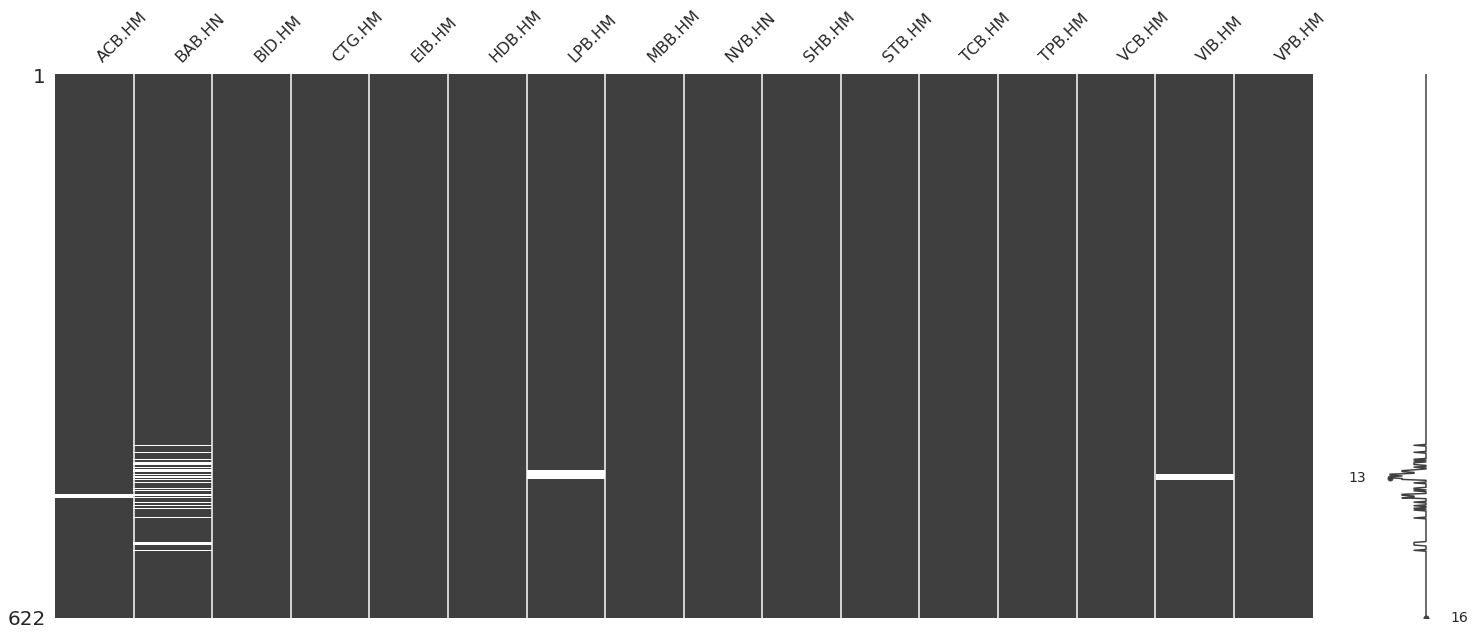

In [176]:
# xem vị trí các missing data trong từng cột 
msno.matrix(cut_data)

In [177]:
cut_data.isnull().sum()

ACB.HM     5
BAB.HN    33
BID.HM     0
CTG.HM     0
EIB.HM     0
HDB.HM     0
LPB.HM    10
MBB.HM     0
NVB.HN     0
SHB.HM     0
STB.HM     0
TCB.HM     0
TPB.HM     0
VCB.HM     0
VIB.HM     7
VPB.HM     0
dtype: int64

##**Impute dữ liệu khuyết** 

### **Phương pháp trung bình 5 ngày trước đó** 

Các dữ liệu khuyết sẽ được tính bằng cách lấy trung bình của 5 giá trị (mỗi tuần thì giao dịch sẽ được thực hiện trong 5 ngày từ thứ hai đến thứ 6) của thời điểm trước nó. (Phương pháp Simple Moving Average)

Vấn đề: do không có dữ liệu trong khoảng thời gian 2 ngày t7-cn, thì pp trung bình động có ổn hay không, trong thời điểm đó thị trường còn có sự biến động thì giá tính bằng trung bình động có chính xác hay không?

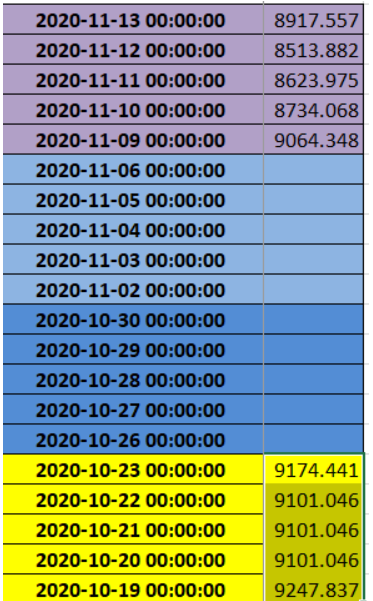

In [178]:
# # tạo một dataframe mới để chứa các giá trị sau khi thực hiện thay thế dữ liệu (imputation) 
# imputed_data = cut_data.copy()

In [179]:
# đầu vào của hàm gồm dataframe và cột cổ phiếu cần xử lý
# kết quả trả về: các giá trị rỗng trong cột cổ phiếu của dataframe đầu vào sẽ được thay thế bằng các giá trị mới 

# def rolling_imputation(data, stock):
#     stock_name = stock
#     temp_df = data[stock_name].copy().reset_index()

#     nan_df = temp_df[temp_df.isna().any(axis=1)]
#     nan_index_list = nan_df.index.tolist()


#     for element in nan_index_list[::-1]:
#         rolling_df = temp_df[stock_name].iloc[element+1:element+6]
#         rolling_value = sum(rolling_df)/len(rolling_df)
#         temp_df.loc[element, stock_name] = rolling_value
#     data[stock_name] = temp_df[stock_name].values


Xử lý missing data cột ACB.HM, BAB.HN, LPB.HM, SHB.HM, VIB.HM

In [180]:
# rolling_imputation(imputed_data, 'ACB.HM')

In [181]:
# imputed_data['ACB.HM']["2020-12-01":"2020-12-08"]

In [182]:
# rolling_imputation(imputed_data, 'BAB.HN')

In [183]:
# rolling_imputation(imputed_data, 'LPB.HM')

In [184]:
# rolling_imputation(imputed_data, 'SHB.HM')

In [185]:
# rolling_imputation(imputed_data, 'VIB.HM')

### **Phương pháp LOCF** 

In [186]:
# tạo một dataframe mới để chứa các giá trị sau khi thực hiện thay thế dữ liệu (imputation) 
imputed_data = cut_data.copy()

In [187]:
imputed_data = imputed_data.fillna(method='ffill')

In [188]:
imputed_data.isnull().sum()

ACB.HM    0
BAB.HN    0
BID.HM    0
CTG.HM    0
EIB.HM    0
HDB.HM    0
LPB.HM    0
MBB.HM    0
NVB.HN    0
SHB.HM    0
STB.HM    0
TCB.HM    0
TPB.HM    0
VCB.HM    0
VIB.HM    0
VPB.HM    0
dtype: int64

In [189]:
fig = px.line(imputed_data, width=1500, height=900)
fig.show()

In [190]:
fig = px.line(imputed_data['ACB.HM']["2020-12-01":"2020-12-08"])
fig.show()

<AxesSubplot:>

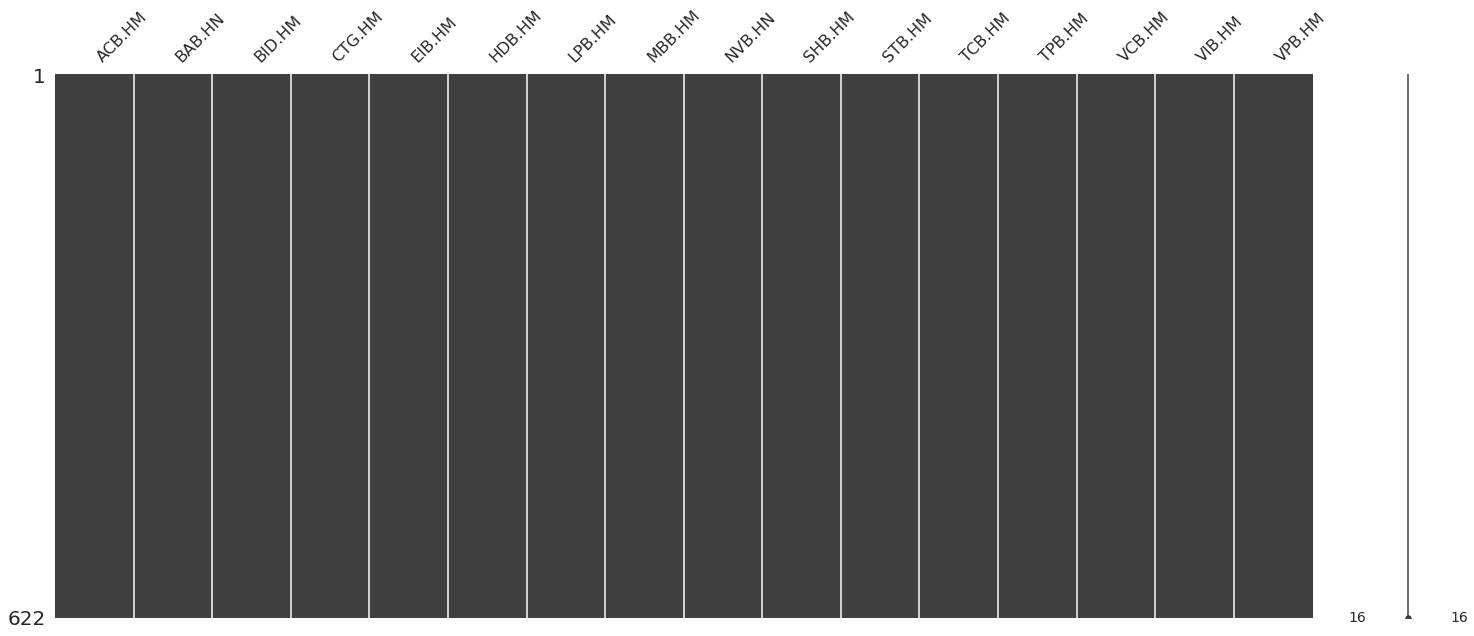

In [191]:
msno.matrix(imputed_data)

In [192]:
fig = px.box(imputed_data)
fig.show()

## **Chia tập train/test** 

In [193]:
train_set = imputed_data['2019-01-02':'2020-12-31']
test_set = imputed_data['2021-01-04':'2021-06-30']

In [194]:
imputed_data

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2019-01-02  11057.994800  13929.424152  25213.699360  14166.247361   14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591   13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583   14050   
2019-01-07  10868.645574  13861.805588  24310.522070  13532.494190   14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198   14000   
...                  ...           ...           ...           ...     ...   
2021-06-24  28960.000000  22647.301812  35772.609959  40385.008870   29150   
2021-06-25  29080.000000  22560.196805  36049.610257  40687.518300   29250   
2021-06-28  29360.000000  23169.931854  37118.039979  41141.282444   29800   
2021-06-29  29160.000000  23431.246874  37118.039979  40763.145657   30500   
2021-06-30  28560.000000  22908.616833  37395.040277  39855.617368   30300   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2019-01-02  13672.704237   6071.812743   9276.661667   6949.6122   
2019-01-03  13648.461854   5938.366309   8869.159733   6709.9704   
2019-01-04  14060.582372   5871.643092   8917.101137   6709.9704   
2019-01-07  14012.097605   5804.919875   9084.896051   6709.9704   
2019-01-08  13818.158538   5938.366309   9036.954647   6630.0898   
...                  ...           ...           ...         ...   
2021-06-24  27400.000000  23776.479990  25925.924630  15097.4334   
2021-06-25  28240.000000  23816.847529  25987.653022  15177.3140   
2021-06-28  28800.000000  24341.625525  26604.936941  15416.9558   
2021-06-29  28720.000000  24624.198292  26820.986313  15576.7170   
2021-06-30  28400.000000  24180.155372  26759.257921  15416.9558   

                  SHB.HM  STB.HM  TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                
2019-01-02   4379.137728   11600   25600  12095.080969  41160.938337   
2019-01-03   4257.495013   11100   25000  11822.259594  41160.938337   
2019-01-04   4257.495013   11150   24950  11791.946108  41775.280700   
2019-01-07   4379.137728   11500   25100  11913.200052  41928.866291   
2019-01-08   4257.495013   11350   25100  11943.513539  42236.037473   
...                  ...     ...     ...           ...           ...   
2021-06-24  21839.301344   29000   50900  26407.416650  85702.875070   
2021-06-25  21920.187645   29500   51600  26592.601900  87173.836792   
2021-06-28  22648.164357   30200   53600  27888.898650  87173.836792   
2021-06-29  23052.595863   31000   53500  27629.639300  88257.703324   
2021-06-30  23214.368466   30600   52700  27222.231750  90115.760236   

                  VIB.HM        VPB.HM  
date_id                                 
2019-01-02   6241.894075  10777.894828  
2019-01-03   6136.693613  10555.670192  
2019-01-04   6171.760433  10527.892113  
2019-01-07   6206.827254  10694.560589  
2019-01-08   6241.894075  10639.004430  
...                  ...           ...  
2021-06-24  37037.050000  38111.525009  
2021-06-25  36370.383100  37889.300374  
2021-06-28  37000.012950  37778.188056  
2021-06-29  37037.050000  37167.070308  
2021-06-30  36629.642450  37611.519579  

[622 rows x 16 columns]

In [195]:
train_set

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2019-01-02  11057.994800  13929.424152  25213.699360  14166.247361   14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591   13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583   14050   
2019-01-07  10868.645574  13861.805588  24310.522070  13532.494190   14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198   14000   
...                  ...           ...           ...           ...     ...   
2020-12-25  17888.000000  15853.111268  36266.585857  26242.693030   19100   
2020-12-28  17792.000000  15853.111268  36928.100835  25940.183600   18800   
2020-12-29  17728.000000  17856.526429  37628.528459  25826.742564   18800   
2020-12-30  17792.000000  16549.951324  37395.052584  25977.997279   20100   
2020-12-31  17984.000000  18727.576498  37909.469403  26129.251994   19250   

                  HDB.HM        LPB.HM        MBB.HM     NVB.HN        SHB.HM  \
date_id                                                                         
2019-01-02  13672.704237   6071.812743   9276.661667  6949.6122   4379.137728   
2019-01-03  13648.461854   5938.366309   8869.159733  6709.9704   4257.495013   
2019-01-04  14060.582372   5871.643092   8917.101137  6709.9704   4257.495013   
2019-01-07  14012.097605   5804.919875   9084.896051  6709.9704   4379.137728   
2019-01-08  13818.158538   5938.366309   9036.954647  6630.0898   4257.495013   
...                  ...           ...           ...        ...           ...   
2020-12-25  19200.000000  10011.149470  14128.757812  7349.0152  12794.743481   
2020-12-28  19080.000000  10011.149470  14098.176085  7269.1346  12794.743481   
2020-12-29  18920.000000   9970.781931  14037.012631  7269.1346  12647.677464   
2020-12-30  18880.000000   9970.781931  14006.430905  7269.1346  12500.611447   
2020-12-31  19000.000000  10011.149470  14067.594358  7988.0600  12500.611447   

            STB.HM  TCB.HM        TPB.HM        VCB.HM        VIB.HM  \
date_id                                                                
2019-01-02   11600   25600  12095.080969  41160.938337   6241.894075   
2019-01-03   11100   25000  11822.259594  41160.938337   6136.693613   
2019-01-04   11150   24950  11791.946108  41775.280700   6171.760433   
2019-01-07   11500   25100  11913.200052  41928.866291   6206.827254   
2019-01-08   11350   25100  11943.513539  42236.037473   6241.894075   
...            ...     ...           ...           ...           ...   
2020-12-25   16950   29550  20111.118150  75560.981091  17354.510370   
2020-12-28   16750   29700  19925.932900  75870.657243  17328.055324   
2020-12-29   16700   29750  19629.636500  76799.685699  17407.420463   
2020-12-30   16800   29900  19666.673550  75793.238205  17460.330556   
2020-12-31   16900   31500  19851.858800  75793.238205  17142.870000   

                  VPB.HM  
date_id                   
2019-01-02  10777.894828  
2019-01-03  10555.670192  
2019-01-04  10527.892113  
2019-01-07  10694.560589  
2019-01-08  10639.004430  
...                  ...  
2020-12-25  18055.751644  
2020-12-28  17944.639327  
2020-12-29  17611.302373  
2020-12-30  17666.858532  
2020-12-31  18055.751644  

[502 rows x 16 columns]

In [196]:
test_set

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                 
2021-01-04  18336.0  18292.051463  38186.469701  26847.711889   19500   
2021-01-05  18784.0  18379.156470  37909.469403  26772.084532   19500   
2021-01-06  19136.0  18379.156470  38621.755884  28624.954789   20500   
2021-01-07  19136.0  18727.576498  38700.898827  29381.228363   20100   
2021-01-08  19328.0  18727.576498  38384.327057  29267.787327   20400   
...             ...           ...           ...           ...     ...   
2021-06-24  28960.0  22647.301812  35772.609959  40385.008870   29150   
2021-06-25  29080.0  22560.196805  36049.610257  40687.518300   29250   
2021-06-28  29360.0  23169.931854  37118.039979  41141.282444   29800   
2021-06-29  29160.0  23431.246874  37118.039979  40763.145657   30500   
2021-06-30  28560.0  22908.616833  37395.040277  39855.617368   30300   

             HDB.HM        LPB.HM        MBB.HM      NVB.HN        SHB.HM  \
date_id                                                                     
2021-01-04  19280.0  10212.987161  14648.647169   8706.9854  12647.677464   
2021-01-05  19800.0  10899.235310  15382.608614   8946.6272  13015.342507   
2021-01-06  20520.0  11302.910692  15617.283170   8946.6272  13088.875515   
2021-01-07  21440.0  11222.175615  15987.653522   8866.7466  14118.337634   
2021-01-08  21680.0  11343.278230  16419.752265   9026.5078  14044.804626   
...             ...           ...           ...         ...           ...   
2021-06-24  27400.0  23776.479990  25925.924630  15097.4334  21839.301344   
2021-06-25  28240.0  23816.847529  25987.653022  15177.3140  21920.187645   
2021-06-28  28800.0  24341.625525  26604.936941  15416.9558  22648.164357   
2021-06-29  28720.0  24624.198292  26820.986313  15576.7170  23052.595863   
2021-06-30  28400.0  24180.155372  26759.257921  15416.9558  23214.368466   

            STB.HM  TCB.HM       TPB.HM        VCB.HM        VIB.HM  \
date_id                                                               
2021-01-04   17550   33000  20592.59980  76644.847623  17460.330556   
2021-01-05   17700   33050  20555.56275  76877.104737  18677.262685   
2021-01-06   18000   33200  20740.74800  81289.989903  18703.717731   
2021-01-07   18450   34600  21000.00735  82838.370664  18518.532407   
2021-01-08   19400   35700  21111.11850  81135.151827  18386.257176   
...            ...     ...          ...           ...           ...   
2021-06-24   29000   50900  26407.41665  85702.875070  37037.050000   
2021-06-25   29500   51600  26592.60190  87173.836792  36370.383100   
2021-06-28   30200   53600  27888.89865  87173.836792  37000.012950   
2021-06-29   31000   53500  27629.63930  88257.703324  37037.050000   
2021-06-30   30600   52700  27222.23175  90115.760236  36629.642450   

                  VPB.HM  
date_id                   
2021-01-04  19000.206346  
2021-01-05  19083.540584  
2021-01-06  19111.318664  
2021-01-07  19389.099458  
2021-01-08  19750.214491  
...                  ...  
2021-06-24  38111.525009  
2021-06-25  37889.300374  
2021-06-28  37778.188056  
2021-06-29  37167.070308  
2021-06-30  37611.519579  

[120 rows x 16 columns]

## **Phân phối của dữ liệu**

In [197]:
fig = px.histogram(train_set,
                   marginal="box", # or violin, rug, 
                   width=2000, height=1000)
fig.show()

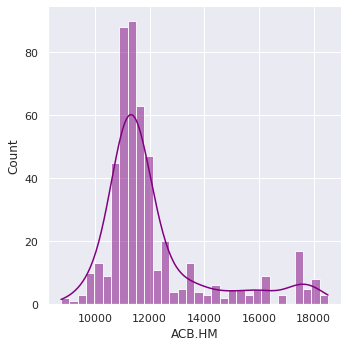

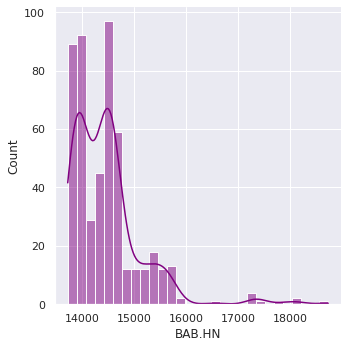

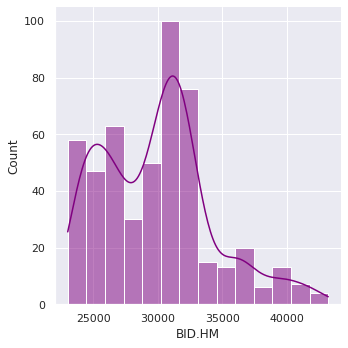

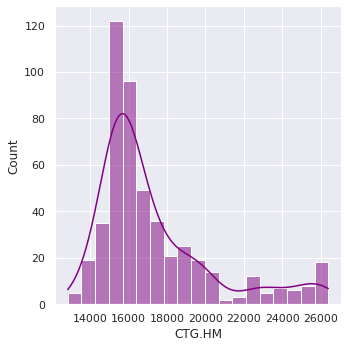

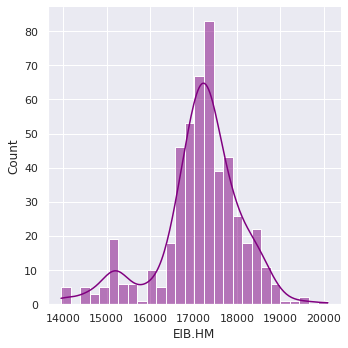

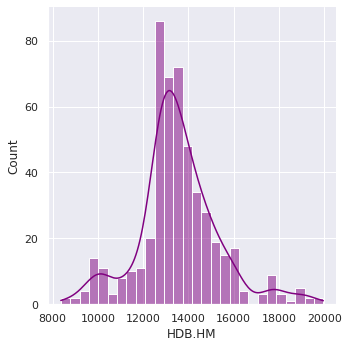

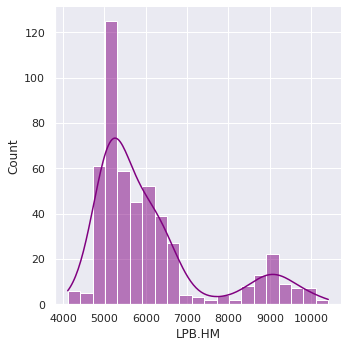

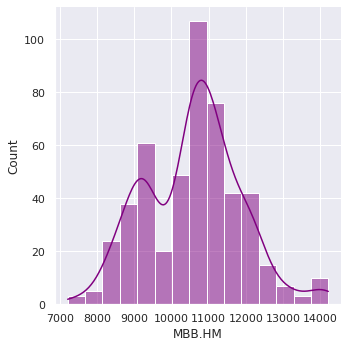

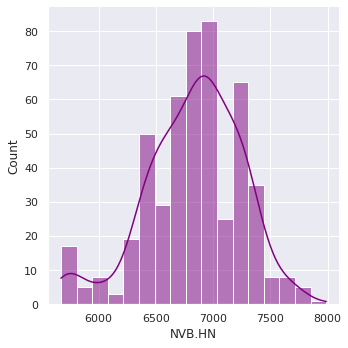

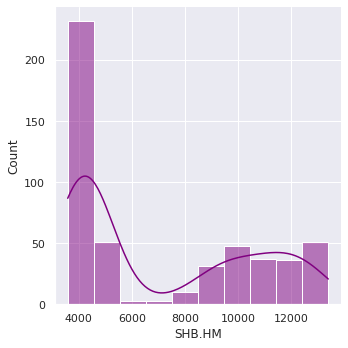

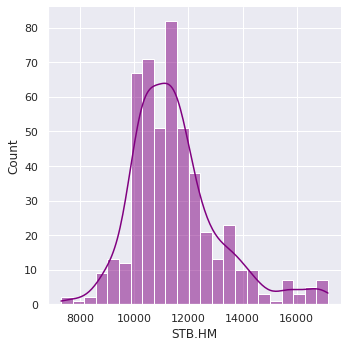

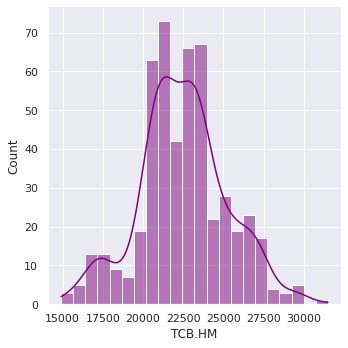

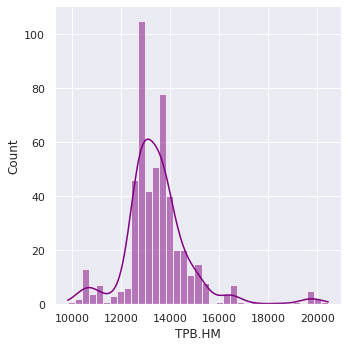

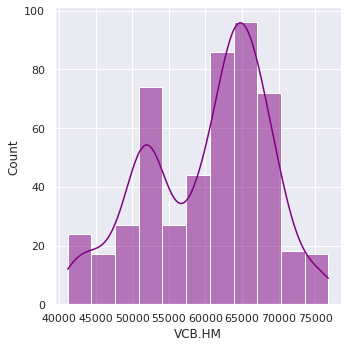

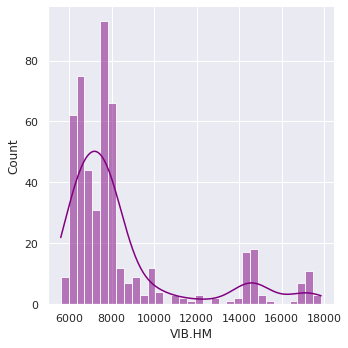

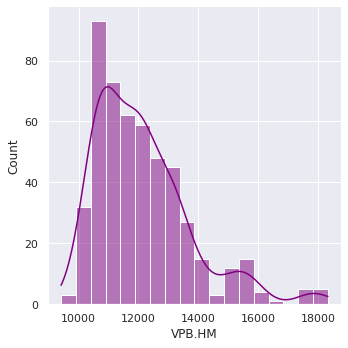

In [198]:
column_name = train_set.columns.tolist()
for column in column_name:
  sns.displot(train_set[column], kde=True, color='purple') 

## **Data Transformation** 

Lấy logarit tự nhiên của các cột giá trị.

* "the natural logarithm (predominantly used in mathematics and physics and in economics and business" (tham khảo: https://people.duke.edu/~rnau/411log.htm)
và https://sci-hub.se/10.2139/ssrn.1505506 

In [199]:
transformed_train_set = train_set.copy()
transformed_train_set

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2019-01-02  11057.994800  13929.424152  25213.699360  14166.247361   14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591   13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583   14050   
2019-01-07  10868.645574  13861.805588  24310.522070  13532.494190   14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198   14000   
...                  ...           ...           ...           ...     ...   
2020-12-25  17888.000000  15853.111268  36266.585857  26242.693030   19100   
2020-12-28  17792.000000  15853.111268  36928.100835  25940.183600   18800   
2020-12-29  17728.000000  17856.526429  37628.528459  25826.742564   18800   
2020-12-30  17792.000000  16549.951324  37395.052584  25977.997279   20100   
2020-12-31  17984.000000  18727.576498  37909.469403  26129.251994   19250   

                  HDB.HM        LPB.HM        MBB.HM     NVB.HN        SHB.HM  \
date_id                                                                         
2019-01-02  13672.704237   6071.812743   9276.661667  6949.6122   4379.137728   
2019-01-03  13648.461854   5938.366309   8869.159733  6709.9704   4257.495013   
2019-01-04  14060.582372   5871.643092   8917.101137  6709.9704   4257.495013   
2019-01-07  14012.097605   5804.919875   9084.896051  6709.9704   4379.137728   
2019-01-08  13818.158538   5938.366309   9036.954647  6630.0898   4257.495013   
...                  ...           ...           ...        ...           ...   
2020-12-25  19200.000000  10011.149470  14128.757812  7349.0152  12794.743481   
2020-12-28  19080.000000  10011.149470  14098.176085  7269.1346  12794.743481   
2020-12-29  18920.000000   9970.781931  14037.012631  7269.1346  12647.677464   
2020-12-30  18880.000000   9970.781931  14006.430905  7269.1346  12500.611447   
2020-12-31  19000.000000  10011.149470  14067.594358  7988.0600  12500.611447   

            STB.HM  TCB.HM        TPB.HM        VCB.HM        VIB.HM  \
date_id                                                                
2019-01-02   11600   25600  12095.080969  41160.938337   6241.894075   
2019-01-03   11100   25000  11822.259594  41160.938337   6136.693613   
2019-01-04   11150   24950  11791.946108  41775.280700   6171.760433   
2019-01-07   11500   25100  11913.200052  41928.866291   6206.827254   
2019-01-08   11350   25100  11943.513539  42236.037473   6241.894075   
...            ...     ...           ...           ...           ...   
2020-12-25   16950   29550  20111.118150  75560.981091  17354.510370   
2020-12-28   16750   29700  19925.932900  75870.657243  17328.055324   
2020-12-29   16700   29750  19629.636500  76799.685699  17407.420463   
2020-12-30   16800   29900  19666.673550  75793.238205  17460.330556   
2020-12-31   16900   31500  19851.858800  75793.238205  17142.870000   

                  VPB.HM  
date_id                   
2019-01-02  10777.894828  
2019-01-03  10555.670192  
2019-01-04  10527.892113  
2019-01-07  10694.560589  
2019-01-08  10639.004430  
...                  ...  
2020-12-25  18055.751644  
2020-12-28  17944.639327  
2020-12-29  17611.302373  
2020-12-30  17666.858532  
2020-12-31  18055.751644  

[502 rows x 16 columns]

In [200]:
for column in transformed_train_set.columns.tolist():
  transformed_train_set[column] = transformed_train_set[column].astype(float)
  transformed_train_set[column] = np.log(transformed_train_set[column])

transformed_train_set

ACB.HM    BAB.HN     BID.HM     CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                    
2019-01-02  9.310909  9.541759  10.135143   9.558617  9.546813  9.523157   
2019-01-03  9.272510  9.536893  10.089333   9.510090  9.543235  9.521382   
2019-01-04  9.279602  9.532003  10.075171   9.523808  9.550378  9.551131   
2019-01-07  9.293637  9.536893  10.098665   9.512849  9.546813  9.547676   
2019-01-08  9.286644  9.536893  10.089333   9.498979  9.546813  9.533739   
...              ...       ...        ...        ...       ...       ...   
2020-12-25  9.791885  9.671121  10.498652  10.175143  9.857444  9.862666   
2020-12-28  9.786504  9.671121  10.516728  10.163549  9.841612  9.856396   
2020-12-29  9.782901  9.790124  10.535518  10.159166  9.841612  9.847975   
2020-12-30  9.786504  9.714138  10.529294  10.165005  9.908475  9.845858   
2020-12-31  9.797238  9.837752  10.542956  10.170811  9.865266  9.852194   

              LPB.HM    MBB.HM    NVB.HN    SHB.HM    STB.HM     TCB.HM  \
date_id                                                                   
2019-01-02  8.711412  9.135257  8.846441  8.384607  9.358760  10.150348   
2019-01-03  8.689189  9.090335  8.811350  8.356436  9.314700  10.126631   
2019-01-04  8.677890  9.095726  8.811350  8.356436  9.319195  10.124629   
2019-01-07  8.666461  9.114369  8.811350  8.384607  9.350102  10.130623   
2019-01-08  8.689189  9.109078  8.799374  8.356436  9.336973  10.130623   
...              ...       ...       ...       ...       ...        ...   
2020-12-25  9.211455  9.555968  8.902322  9.456790  9.738023  10.293839   
2020-12-28  9.211455  9.553801  8.891393  9.456790  9.726154  10.298902   
2020-12-29  9.207414  9.549453  8.891393  9.445229  9.723164  10.300584   
2020-12-30  9.207414  9.547272  8.891393  9.433533  9.729134  10.305614   
2020-12-31  9.211455  9.551629  8.985703  9.433533  9.735069  10.357743   

              TPB.HM     VCB.HM    VIB.HM    VPB.HM  
date_id                                              
2019-01-02  9.400554  10.625245  8.739039  9.285253  
2019-01-03  9.377739  10.625245  8.722041  9.264418  
2019-01-04  9.375172  10.640060  8.727739  9.261783  
2019-01-07  9.385402  10.643730  8.733405  9.277491  
2019-01-08  9.387944  10.651029  8.739039  9.272282  
...              ...        ...       ...       ...  
2020-12-25  9.909028  11.232695  9.761608  9.801220  
2020-12-28  9.899777  11.236785  9.760082  9.795047  
2020-12-29  9.884796  11.248956  9.764652  9.776296  
2020-12-30  9.886681  11.235764  9.767687  9.779446  
2020-12-31  9.896053  11.235764  9.749338  9.801220  

[502 rows x 16 columns]

### **Phân phối của dữ liệu đã transformed** 

In [201]:
fig = px.histogram(transformed_train_set,
                   marginal="box", # or violin, rug, 
                   width=1500, height=900)
fig.show()

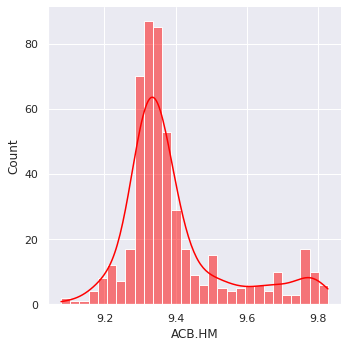

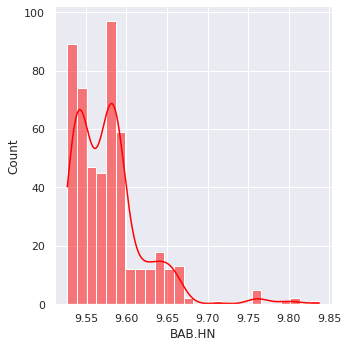

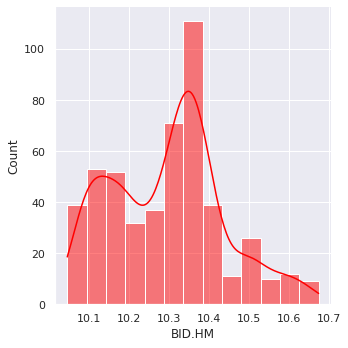

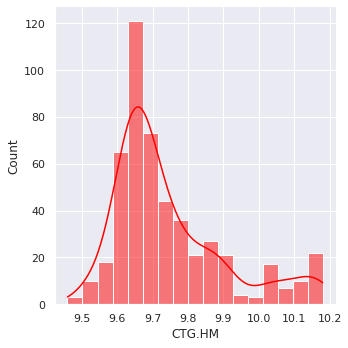

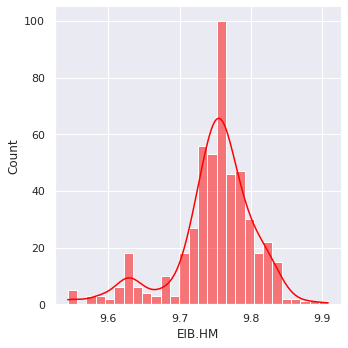

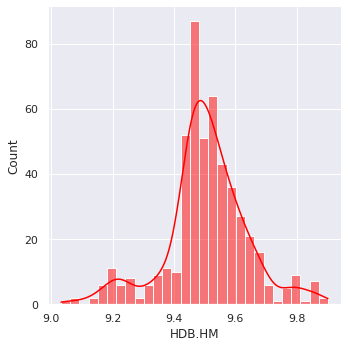

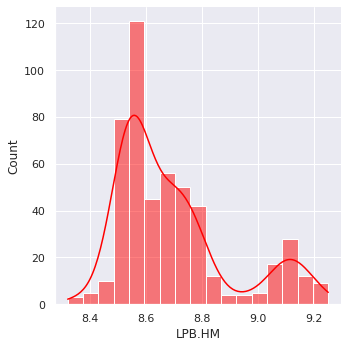

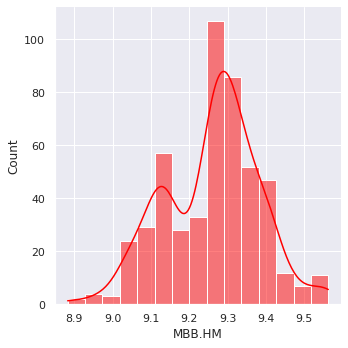

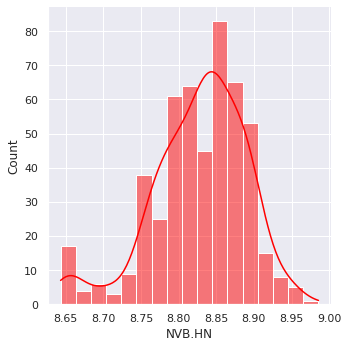

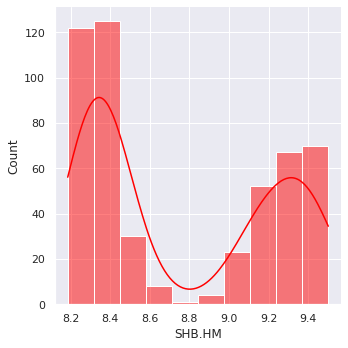

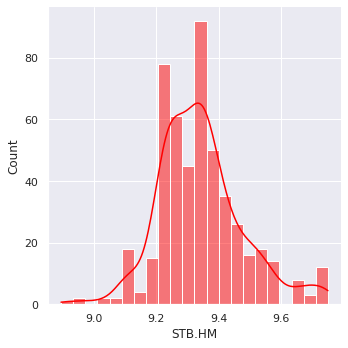

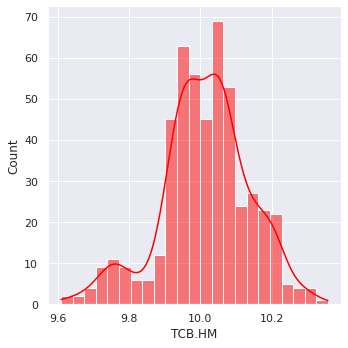

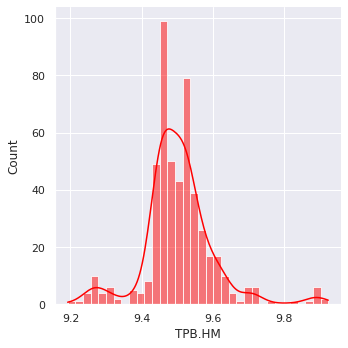

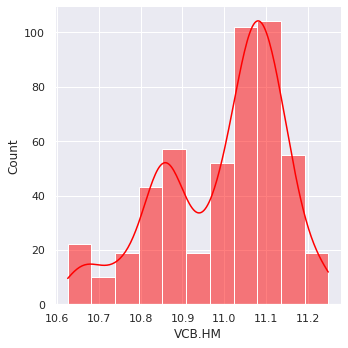

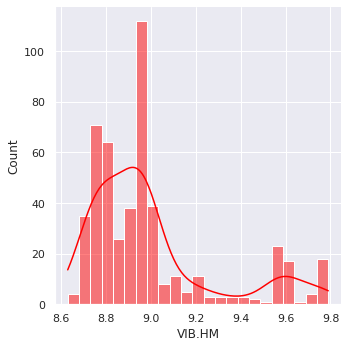

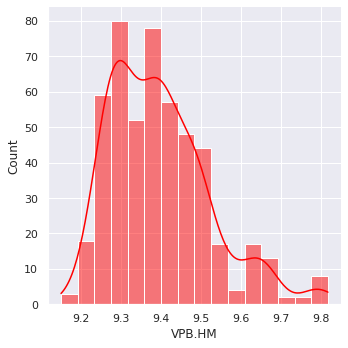

In [202]:
column_name = transformed_train_set.columns.tolist()
for column in column_name:
  sns.displot(transformed_train_set[column], kde=True, color='red') 

In [203]:
fig = px.line(train_set, width=1000, height=600)
fig.show()

In [204]:
fig = px.line(transformed_train_set, width=1000, height=600)
fig.show()

#  **Pair Selection Method ALL PERIOD** 

## **Distance Approach Gatev Approach** 

Dựa trên phương pháp của Gatev et al 2006 sử dụng cummulative total return để normalize dữ liệu gốc, không sử dụng dữ liệu đã transform 

Tham khảo tại đây:

* 1. https://www.researchgate.net/publication/5217081_Pairs_Trading_Performance_of_a_Relative_Value_Arbitrage_Rule

* 2. http://uu.diva-portal.org/smash/get/diva2:1477748/FULLTEXT01.pdf 

* 3. https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html 

**What Is a Return?**

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return is a percentage defined as the change of price expressed as a fraction of the initial price.

Returns exhibit more attractive statistical properties than asset prices themselves. Therefore it also makes more statistical sense to analyze return data rather than price series.

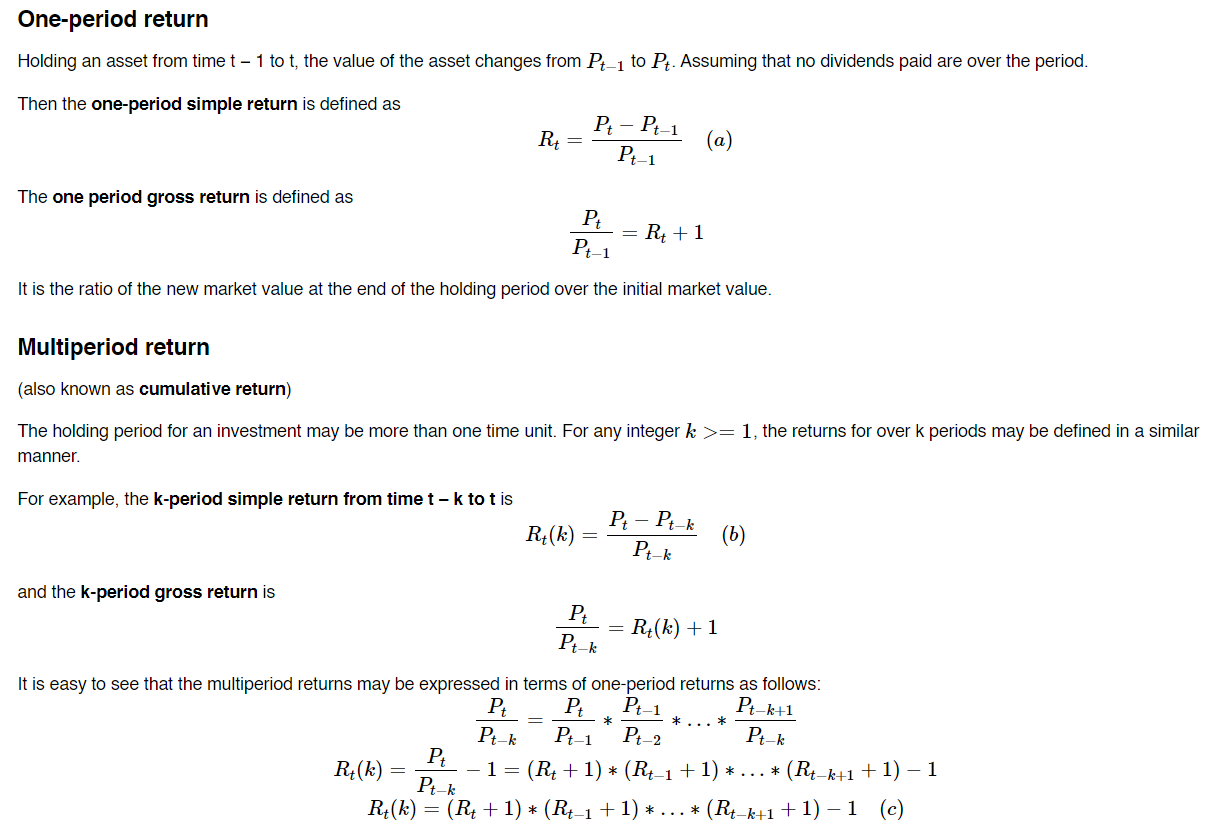

### **Normalize dữ liệu**

In [205]:
train_set 

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2019-01-02  11057.994800  13929.424152  25213.699360  14166.247361   14000   
2019-01-03  10641.426503  13861.805588  24084.727747  13495.214591   13950   
2019-01-04  10717.166194  13794.187024  23746.036263  13681.612583   14050   
2019-01-07  10868.645574  13861.805588  24310.522070  13532.494190   14000   
2019-01-08  10792.905884  13861.805588  24084.727747  13346.096198   14000   
...                  ...           ...           ...           ...     ...   
2020-12-25  17888.000000  15853.111268  36266.585857  26242.693030   19100   
2020-12-28  17792.000000  15853.111268  36928.100835  25940.183600   18800   
2020-12-29  17728.000000  17856.526429  37628.528459  25826.742564   18800   
2020-12-30  17792.000000  16549.951324  37395.052584  25977.997279   20100   
2020-12-31  17984.000000  18727.576498  37909.469403  26129.251994   19250   

                  HDB.HM        LPB.HM        MBB.HM     NVB.HN        SHB.HM  \
date_id                                                                         
2019-01-02  13672.704237   6071.812743   9276.661667  6949.6122   4379.137728   
2019-01-03  13648.461854   5938.366309   8869.159733  6709.9704   4257.495013   
2019-01-04  14060.582372   5871.643092   8917.101137  6709.9704   4257.495013   
2019-01-07  14012.097605   5804.919875   9084.896051  6709.9704   4379.137728   
2019-01-08  13818.158538   5938.366309   9036.954647  6630.0898   4257.495013   
...                  ...           ...           ...        ...           ...   
2020-12-25  19200.000000  10011.149470  14128.757812  7349.0152  12794.743481   
2020-12-28  19080.000000  10011.149470  14098.176085  7269.1346  12794.743481   
2020-12-29  18920.000000   9970.781931  14037.012631  7269.1346  12647.677464   
2020-12-30  18880.000000   9970.781931  14006.430905  7269.1346  12500.611447   
2020-12-31  19000.000000  10011.149470  14067.594358  7988.0600  12500.611447   

            STB.HM  TCB.HM        TPB.HM        VCB.HM        VIB.HM  \
date_id                                                                
2019-01-02   11600   25600  12095.080969  41160.938337   6241.894075   
2019-01-03   11100   25000  11822.259594  41160.938337   6136.693613   
2019-01-04   11150   24950  11791.946108  41775.280700   6171.760433   
2019-01-07   11500   25100  11913.200052  41928.866291   6206.827254   
2019-01-08   11350   25100  11943.513539  42236.037473   6241.894075   
...            ...     ...           ...           ...           ...   
2020-12-25   16950   29550  20111.118150  75560.981091  17354.510370   
2020-12-28   16750   29700  19925.932900  75870.657243  17328.055324   
2020-12-29   16700   29750  19629.636500  76799.685699  17407.420463   
2020-12-30   16800   29900  19666.673550  75793.238205  17460.330556   
2020-12-31   16900   31500  19851.858800  75793.238205  17142.870000   

                  VPB.HM  
date_id                   
2019-01-02  10777.894828  
2019-01-03  10555.670192  
2019-01-04  10527.892113  
2019-01-07  10694.560589  
2019-01-08  10639.004430  
...                  ...  
2020-12-25  18055.751644  
2020-12-28  17944.639327  
2020-12-29  17611.302373  
2020-12-30  17666.858532  
2020-12-31  18055.751644  

[502 rows x 16 columns]

### **Compute cumulative returns from prices** 

In [206]:
cum_return = (train_set.iloc[-1] - train_set.iloc[0]) / train_set.iloc[0]
cum_return

ACB.HM    0.626335
BAB.HN    0.344462
BID.HM    0.503527
CTG.HM    0.844472
EIB.HM    0.375000
HDB.HM    0.389630
LPB.HM    0.648791
MBB.HM    0.516450
NVB.HN    0.149425
SHB.HM    1.854583
STB.HM    0.456897
TCB.HM    0.230469
TPB.HM    0.641317
VCB.HM    0.841388
VIB.HM    1.746421
VPB.HM    0.675258
dtype: float64

These are the **rates of change** for each stock. We will multiple by 100 to get the numbers as percentage change.


In [207]:
cum_return * 100

ACB.HM     62.633464
BAB.HN     34.446164
BID.HM     50.352667
CTG.HM     84.447238
EIB.HM     37.500000
HDB.HM     38.963000
LPB.HM     64.879088
MBB.HM     51.645008
NVB.HN     14.942529
SHB.HM    185.458285
STB.HM     45.689655
TCB.HM     23.046875
TPB.HM     64.131673
VCB.HM     84.138752
VIB.HM    174.642117
VPB.HM     67.525773
dtype: float64

### **Compute cumulative returns from simple daily returns** 

*We will use formula (a) and pandas built in function pct_change to compute the simple returns for each day, each stock in our dataset.*

In [208]:
# compute daily returns using pandas pct_change()
df_daily_returns = train_set.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

ACB.HM    BAB.HN    BID.HM    CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                  
2019-01-03 -0.037671 -0.004854 -0.044776 -0.047368 -0.003571 -0.001773   
2019-01-04  0.007117 -0.004878 -0.014063  0.013812  0.007168  0.030195   
2019-01-07  0.014134  0.004902  0.023772 -0.010899 -0.003559 -0.003448   
2019-01-08 -0.006969  0.000000 -0.009288 -0.013774  0.000000 -0.013841   
2019-01-09  0.017544  0.000000  0.031250  0.025140  0.042857  0.014035   
...              ...       ...       ...       ...       ...       ...   
2020-12-25  0.023810 -0.125000  0.024176  0.022091  0.005263  0.034483   
2020-12-28 -0.005367  0.000000  0.018240 -0.011527 -0.015707 -0.006250   
2020-12-29 -0.003597  0.126374  0.018967 -0.004373  0.000000 -0.008386   
2020-12-30  0.003610 -0.073171 -0.006205  0.005857  0.069149 -0.002114   
2020-12-31  0.010791  0.131579  0.013756  0.005822 -0.042289  0.006356   

              LPB.HM    MBB.HM    NVB.HN    SHB.HM    STB.HM    TCB.HM  \
date_id                                                                  
2019-01-03 -0.021978 -0.043928 -0.034483 -0.027778 -0.043103 -0.023438   
2019-01-04 -0.011236  0.005405  0.000000  0.000000  0.004505 -0.002000   
2019-01-07 -0.011364  0.018817  0.000000  0.028571  0.031390  0.006012   
2019-01-08  0.022989 -0.005277 -0.011905 -0.027778 -0.013043  0.000000   
2019-01-09 -0.011236  0.026525  0.000000  0.028571  0.004405  0.027888   
...              ...       ...       ...       ...       ...       ...   
2020-12-25  0.008130  0.013158  0.022222  0.005780  0.027273  0.057245   
2020-12-28  0.000000 -0.002165 -0.010870  0.000000 -0.011799  0.005076   
2020-12-29 -0.004032 -0.004338  0.000000 -0.011494 -0.002985  0.001684   
2020-12-30  0.000000 -0.002179  0.000000 -0.011628  0.005988  0.005042   
2020-12-31  0.004049  0.004367  0.098901  0.000000  0.005952  0.053512   

              TPB.HM    VCB.HM    VIB.HM    VPB.HM  
date_id                                             
2019-01-03 -0.022556  0.000000 -0.016854 -0.020619  
2019-01-04 -0.002564  0.014925  0.005714 -0.002632  
2019-01-07  0.010283  0.003676  0.005682  0.015831  
2019-01-08  0.002545  0.007326  0.005650 -0.005195  
2019-01-09  0.045685  0.014545  0.000000  0.000000  
...              ...       ...       ...       ...  
2020-12-25  0.044231  0.003083  0.021807  0.031746  
2020-12-28 -0.009208  0.004098 -0.001524 -0.006154  
2020-12-29 -0.014870  0.012245  0.004580 -0.018576  
2020-12-30  0.001887 -0.013105  0.003040  0.003155  
2020-12-31  0.009416  0.000000 -0.018182  0.022013  

[501 rows x 16 columns]

*And finally, the formula (c) on the dataframe of daily returns using pandas' cumprod function.*

In [209]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
# df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns

ACB.HM    BAB.HN    BID.HM    CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                  
2019-01-03 -0.037671 -0.004854 -0.044776 -0.047368 -0.003571 -0.001773   
2019-01-04 -0.030822 -0.009709 -0.058209 -0.034211  0.003571  0.028369   
2019-01-07 -0.017123 -0.004854 -0.035821 -0.044737  0.000000  0.024823   
2019-01-08 -0.023973 -0.004854 -0.044776 -0.057895  0.000000  0.010638   
2019-01-09 -0.006849 -0.004854 -0.014925 -0.034211  0.042857  0.024823   
...              ...       ...       ...       ...       ...       ...   
2020-12-25  0.617653  0.138102  0.438368  0.852480  0.364286  0.404258   
2020-12-28  0.608972  0.138102  0.464605  0.831126  0.342857  0.395481   
2020-12-29  0.603184  0.281929  0.492384  0.823118  0.342857  0.383779   
2020-12-30  0.608972  0.188129  0.483124  0.833795  0.435714  0.380853   
2020-12-31  0.626335  0.344462  0.503527  0.844472  0.375000  0.389630   

              LPB.HM        MBB.HM    NVB.HN        SHB.HM    STB.HM  \
date_id                                                                
2019-01-03 -0.021978 -4.392765e-02 -0.034483 -2.777778e-02 -0.043103   
2019-01-04 -0.032967 -3.875969e-02 -0.034483 -2.777778e-02 -0.038793   
2019-01-07 -0.043956 -2.067183e-02 -0.034483  2.220446e-16 -0.008621   
2019-01-08 -0.021978 -2.583979e-02 -0.045977 -2.777778e-02 -0.021552   
2019-01-09 -0.032967  2.220446e-16 -0.045977  4.440892e-16 -0.017241   
...              ...           ...       ...           ...       ...   
2020-12-25  0.648791  5.230433e-01  0.057471  1.921750e+00  0.461207   
2020-12-28  0.648791  5.197467e-01  0.045977  1.921750e+00  0.443966   
2020-12-29  0.642143  5.131535e-01  0.045977  1.888166e+00  0.439655   
2020-12-30  0.642143  5.098568e-01  0.045977  1.854583e+00  0.448276   
2020-12-31  0.648791  5.164501e-01  0.149425  1.854583e+00  0.456897   

              TCB.HM    TPB.HM    VCB.HM        VIB.HM    VPB.HM  
date_id                                                           
2019-01-03 -0.023438 -0.022556  0.000000 -1.685393e-02 -0.020619  
2019-01-04 -0.025391 -0.025063  0.014925 -1.123596e-02 -0.023196  
2019-01-07 -0.019531 -0.015038  0.018657 -5.617978e-03 -0.007732  
2019-01-08 -0.019531 -0.012531  0.026119 -1.110223e-16 -0.012887  
2019-01-09  0.007812  0.032581  0.041045 -1.110223e-16 -0.012887  
...              ...       ...       ...           ...       ...  
2020-12-25  0.154297  0.662752  0.835745  1.780328e+00  0.675258  
2020-12-28  0.160156  0.647441  0.843268  1.776089e+00  0.664948  
2020-12-29  0.162109  0.622944  0.865839  1.788804e+00  0.634021  
2020-12-30  0.167969  0.626006  0.841388  1.797281e+00  0.639175  
2020-12-31  0.230469  0.641317  0.841388  1.746421e+00  0.675258  

[501 rows x 16 columns]

*Last record of the dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period*

In [210]:
cum_return_entire_period = df_cum_daily_returns.tail(1)
cum_return_entire_period * 100

ACB.HM     BAB.HN     BID.HM     CTG.HM  EIB.HM  HDB.HM  \
date_id                                                                  
2020-12-31  62.633464  34.446164  50.352667  84.447238    37.5  38.963   

               LPB.HM     MBB.HM     NVB.HN      SHB.HM     STB.HM     TCB.HM  \
date_id                                                                         
2020-12-31  64.879088  51.645008  14.942529  185.458285  45.689655  23.046875   

               TPB.HM     VCB.HM      VIB.HM     VPB.HM  
date_id                                                  
2020-12-31  64.131673  84.138752  174.642117  67.525773

**Visualize the returns**

Visualize simple daily return

In [211]:
fig = px.line(df_daily_returns*100,
              title='Performance - Daily Simple Returns', 
              width=1000, height=600,
              )
fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

Visualize cummulative return

In [212]:
fig = px.line(df_cum_daily_returns*100,
              title='Performance - Daily Cumulative Returns', 
              width=1000, height=600,
              )
fig.update_layout(yaxis_title="Daily Cumulative returns (%)")
fig.show()

In [213]:
df_cum_daily_returns_pct = df_cum_daily_returns.copy()
df_cum_daily_returns_pct = df_cum_daily_returns_pct*100
df_cum_daily_returns_pct

ACB.HM     BAB.HN     BID.HM     CTG.HM     EIB.HM     HDB.HM  \
date_id                                                                        
2019-01-03  -3.767123  -0.485437  -4.477612  -4.736842  -0.357143  -0.177305   
2019-01-04  -3.082192  -0.970874  -5.820896  -3.421053   0.357143   2.836879   
2019-01-07  -1.712329  -0.485437  -3.582090  -4.473684   0.000000   2.482270   
2019-01-08  -2.397260  -0.485437  -4.477612  -5.789474   0.000000   1.063830   
2019-01-09  -0.684932  -0.485437  -1.492537  -3.421053   4.285714   2.482270   
...               ...        ...        ...        ...        ...        ...   
2020-12-25  61.765314  13.810242  43.836830  85.248022  36.428571  40.425769   
2020-12-28  60.897164  13.810242  46.460463  83.112598  34.285714  39.548107   
2020-12-29  60.318397  28.192854  49.238428  82.311814  34.285714  38.377893   
2020-12-30  60.897164  18.812889  48.312439  83.379526  43.571429  38.085339   
2020-12-31  62.633464  34.446164  50.352667  84.447238  37.500000  38.963000   

               LPB.HM        MBB.HM     NVB.HN        SHB.HM     STB.HM  \
date_id                                                                   
2019-01-03  -2.197802 -4.392765e+00  -3.448276 -2.777778e+00  -4.310345   
2019-01-04  -3.296703 -3.875969e+00  -3.448276 -2.777778e+00  -3.879310   
2019-01-07  -4.395604 -2.067183e+00  -3.448276  2.220446e-14  -0.862069   
2019-01-08  -2.197802 -2.583979e+00  -4.597701 -2.777778e+00  -2.155172   
2019-01-09  -3.296703  2.220446e-14  -4.597701  4.440892e-14  -1.724138   
...               ...           ...        ...           ...        ...   
2020-12-25  64.879088  5.230433e+01   5.747126  1.921750e+02  46.120690   
2020-12-28  64.879088  5.197467e+01   4.597701  1.921750e+02  44.396552   
2020-12-29  64.214253  5.131535e+01   4.597701  1.888166e+02  43.965517   
2020-12-30  64.214253  5.098568e+01   4.597701  1.854583e+02  44.827586   
2020-12-31  64.879088  5.164501e+01  14.942529  1.854583e+02  45.689655   

               TCB.HM     TPB.HM     VCB.HM        VIB.HM     VPB.HM  
date_id                                                               
2019-01-03  -2.343750  -2.255639   0.000000 -1.685393e+00  -2.061856  
2019-01-04  -2.539062  -2.506266   1.492537 -1.123596e+00  -2.319588  
2019-01-07  -1.953125  -1.503759   1.865672 -5.617978e-01  -0.773196  
2019-01-08  -1.953125  -1.253133   2.611940 -1.110223e-14  -1.288660  
2019-01-09   0.781250   3.258145   4.104478 -1.110223e-14  -1.288660  
...               ...        ...        ...           ...        ...  
2020-12-25  15.429688  66.275184  83.574486  1.780328e+02  67.525773  
2020-12-28  16.015625  64.744105  84.326841  1.776089e+02  66.494845  
2020-12-29  16.210938  62.294379  86.583904  1.788804e+02  63.402062  
2020-12-30  16.796875  62.600594  84.138752  1.797281e+02  63.917526  
2020-12-31  23.046875  64.131673  84.138752  1.746421e+02  67.525773  

[501 rows x 16 columns]

**Tính khoảng cách Euclide dựa trên Cummulative Return** 

In [214]:
# lấy tổ hợp chập 2 các phần tử trong danh sách các cột 
col_combi = list(itertools.combinations(df_cum_daily_returns_pct.columns.tolist(), 2))

In [215]:
#heatmap khoảng cách của các cặp
col =  df_cum_daily_returns_pct.columns.tolist()
dist_gatev = np.zeros((16, 16))
keys = df_cum_daily_returns_pct.keys()
for i in range(16):
      for j in range(i+1, 16):
          S1 = df_cum_daily_returns_pct[keys[i]]
          S2 = df_cum_daily_returns_pct[keys[j]]
          dist = round(np.linalg.norm(S1 - S2),1)
          dist_gatev[i,j] = dist

fig = px.imshow(dist_gatev,
                labels=dict(x="Stock", y="Stock", color="Distance"),
                x=col,
                y=col,  color_continuous_scale='reds',
               width=1000, height=600)
fig.update_xaxes(side="top")
fig.show()

In [216]:
# tính khoảng cách euclide của từng cặp 
value_list = []
for col in col_combi:
  dist = round(np.linalg.norm(df_cum_daily_returns_pct[col[0]] - df_cum_daily_returns_pct[col[1]]),1)
  value_list.append(dist)

# chọn ra 10 cặp có giá trị khoảng cách nhỏ nhất 
top10_smallest = nsmallest(10, value_list)
smallest_pair_gatev = []

for col in col_combi:
  dist = round(np.linalg.norm(df_cum_daily_returns_pct[col[0]] - df_cum_daily_returns_pct[col[1]]),1)
  if dist in top10_smallest:
    pair = [col[0], col[1]]
    smallest_pair_gatev.append(pair)
    print(f"Khoảng cách Euclide của {col[0]} và {col[1]}: {dist}")

for i in smallest_pair_gatev:
  print(i)
print(len(smallest_pair_gatev))

Khoảng cách Euclide của ACB.HM và TPB.HM: 269.5
Khoảng cách Euclide của ACB.HM và VPB.HM: 263.8
Khoảng cách Euclide của BAB.HN và HDB.HM: 264.3
Khoảng cách Euclide của BAB.HN và NVB.HN: 188.9
Khoảng cách Euclide của BAB.HN và STB.HM: 281.6
Khoảng cách Euclide của BAB.HN và TPB.HM: 274.7
Khoảng cách Euclide của HDB.HM và NVB.HN: 280.4
Khoảng cách Euclide của HDB.HM và STB.HM: 135.7
Khoảng cách Euclide của LPB.HM và STB.HM: 288.1
Khoảng cách Euclide của MBB.HM và TPB.HM: 240.6
['ACB.HM', 'TPB.HM']
['ACB.HM', 'VPB.HM']
['BAB.HN', 'HDB.HM']
['BAB.HN', 'NVB.HN']
['BAB.HN', 'STB.HM']
['BAB.HN', 'TPB.HM']
['HDB.HM', 'NVB.HN']
['HDB.HM', 'STB.HM']
['LPB.HM', 'STB.HM']
['MBB.HM', 'TPB.HM']
10


## **Distance Approach MinMax Normalization**

In [217]:
# df_normalized = pd.DataFrame()
# for col in imputed_data.columns.tolist():
#   normalized=(imputed_data[col]-imputed_data[col].min())/(imputed_data[col].max()-imputed_data[col].min())
#   df_normalized[col] = pd.Series(normalized.values)


In [218]:
# df_normalized

In [219]:
# fig = px.line(df_normalized,
#               title='Data Min Max Normalization', 
#               width=1400, height=800,
#               )
# fig.update_layout(yaxis_title="Min Max Normalized Price")
# fig.show()

In [220]:
# #heatmap khoảng cách của các cặp 
# col = df_normalized.columns.tolist()
# dist_minmax = np.zeros((16, 16))
# keys = df_normalized.keys()
# for i in range(16):
#       for j in range(i+1, 16):
#           S1 = df_normalized[keys[i]]
#           S2 = df_normalized[keys[j]]
#           dist = np.linalg.norm(S1 - S2)
#           dist_minmax[i,j] = dist

# fig = px.imshow(dist_minmax,
#                 labels=dict(x="Stock", y="Stock", color="Distance"),
#                 x=col,
#                 y=col,  color_continuous_scale='blues',
#                width=1400, height=900)
# fig.update_xaxes(side="top")
# fig.show()

In [221]:
# col_combi_minmax = list(itertools.combinations(df_normalized.columns.tolist(), 2))
# # tính khoảng cách euclide của từng cặp 
# value_list_minmax = []
# for col in col_combi_minmax:
#   dist = np.linalg.norm(df_normalized[col[0]] - df_normalized[col[1]])
#   value_list_minmax.append(dist)

# # chọn ra 10 cặp có giá trị khoảng cách nhỏ nhất 
# top10_smallest_minmax = nsmallest(10, value_list_minmax)
# smallest_pair_minmax = []

# for col in col_combi_minmax:
#   dist = np.linalg.norm(df_normalized[col[0]] - df_normalized[col[1]])
#   if dist in top10_smallest_minmax:
#     pair = [col[0], col[1]]
#     smallest_pair_minmax.append(pair)
#     print(f"Khoảng cách Euclide của {col[0]} và {col[1]}: {dist}")

# for i in smallest_pair_minmax:
#   print(i)
# print(len(smallest_pair_minmax))

#### **Tính zero crossing** 

In [222]:
# #heatmap khoảng cách của các cặp 
# col = df_normalized.columns.tolist()
# crossing_minmax = np.zeros((16, 16))
# keys = df_normalized.keys()
# for i in range(16):
#       for j in range(i+1, 16):
#           S1 = df_normalized[keys[i]]
#           S2 = df_normalized[keys[j]]
#           spread = (S1 - S2).to_numpy()
#           zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#           crossing_minmax[i,j] = zero_crossings

# fig = px.imshow(crossing_minmax,
#                 labels=dict(x="Stock", y="Stock", color="Zero crossings"),
#                 x=col,
#                 y=col,  color_continuous_scale='algae',
#                width=1400, height=900)
# fig.update_xaxes(side="top")
# fig.show()

In [223]:
# crossing_list = []
# for col in col_combi_minmax:
#   spread = (df_normalized[col[0]] - df_normalized[col[1]]).to_numpy()
#   zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#   crossing_list.append(zero_crossings)

# # chọn ra 10 cặp có zero crossing cao nhất 
# top10_highest_crossing = nlargest(10, crossing_list)
# highest_crossing_pair = []

# for col in col_combi_minmax:
#   spread = (df_normalized[col[0]] - df_normalized[col[1]]).to_numpy()
#   zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#   if zero_crossings in top10_highest_crossing:
#     pair = [col[0], col[1]]
#     highest_crossing_pair.append(pair)
#     print(f"Số lượng zero crossing của {col[0]} và {col[1]}: {dist}")

# for i in highest_crossing_pair:
#   print(i)
# print(len(highest_crossing_pair))

## **Cointegration Approach** 

Sử dụng dạng log tự nhiên của price dể test tính đồng liên kết 

Tham khảo tại đây:

* 1. https://www.researchgate.net/publication/5217081_Pairs_Trading_Performance_of_a_Relative_Value_Arbitrage_Rule

* 2. http://uu.diva-portal.org/smash/get/diva2:1477748/FULLTEXT01.pdf 

### **Pretesting tính Stationary** 

In [224]:
transformed_train_set

ACB.HM    BAB.HN     BID.HM     CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                    
2019-01-02  9.310909  9.541759  10.135143   9.558617  9.546813  9.523157   
2019-01-03  9.272510  9.536893  10.089333   9.510090  9.543235  9.521382   
2019-01-04  9.279602  9.532003  10.075171   9.523808  9.550378  9.551131   
2019-01-07  9.293637  9.536893  10.098665   9.512849  9.546813  9.547676   
2019-01-08  9.286644  9.536893  10.089333   9.498979  9.546813  9.533739   
...              ...       ...        ...        ...       ...       ...   
2020-12-25  9.791885  9.671121  10.498652  10.175143  9.857444  9.862666   
2020-12-28  9.786504  9.671121  10.516728  10.163549  9.841612  9.856396   
2020-12-29  9.782901  9.790124  10.535518  10.159166  9.841612  9.847975   
2020-12-30  9.786504  9.714138  10.529294  10.165005  9.908475  9.845858   
2020-12-31  9.797238  9.837752  10.542956  10.170811  9.865266  9.852194   

              LPB.HM    MBB.HM    NVB.HN    SHB.HM    STB.HM     TCB.HM  \
date_id                                                                   
2019-01-02  8.711412  9.135257  8.846441  8.384607  9.358760  10.150348   
2019-01-03  8.689189  9.090335  8.811350  8.356436  9.314700  10.126631   
2019-01-04  8.677890  9.095726  8.811350  8.356436  9.319195  10.124629   
2019-01-07  8.666461  9.114369  8.811350  8.384607  9.350102  10.130623   
2019-01-08  8.689189  9.109078  8.799374  8.356436  9.336973  10.130623   
...              ...       ...       ...       ...       ...        ...   
2020-12-25  9.211455  9.555968  8.902322  9.456790  9.738023  10.293839   
2020-12-28  9.211455  9.553801  8.891393  9.456790  9.726154  10.298902   
2020-12-29  9.207414  9.549453  8.891393  9.445229  9.723164  10.300584   
2020-12-30  9.207414  9.547272  8.891393  9.433533  9.729134  10.305614   
2020-12-31  9.211455  9.551629  8.985703  9.433533  9.735069  10.357743   

              TPB.HM     VCB.HM    VIB.HM    VPB.HM  
date_id                                              
2019-01-02  9.400554  10.625245  8.739039  9.285253  
2019-01-03  9.377739  10.625245  8.722041  9.264418  
2019-01-04  9.375172  10.640060  8.727739  9.261783  
2019-01-07  9.385402  10.643730  8.733405  9.277491  
2019-01-08  9.387944  10.651029  8.739039  9.272282  
...              ...        ...       ...       ...  
2020-12-25  9.909028  11.232695  9.761608  9.801220  
2020-12-28  9.899777  11.236785  9.760082  9.795047  
2020-12-29  9.884796  11.248956  9.764652  9.776296  
2020-12-30  9.886681  11.235764  9.767687  9.779446  
2020-12-31  9.896053  11.235764  9.749338  9.801220  

[502 rows x 16 columns]

In [225]:
#Ho: It is have unit root, non-stationary
#H1: It is stationary

def adfuller_test(price, col):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    # labels = ['p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(f"{col}: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary \n")
    else:
        print(f"{col}: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [226]:
# adf test các stock chưa lấy sai phân
for col in transformed_train_set.columns.tolist():
  adfuller_test(transformed_train_set[col], col)

ADF Test Statistic : -0.13368652260790417
p-value : 0.945978131142967
#Lags Used : 13
Number of Observations Used : 488
ACB.HM: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : 2.1075940094776238
p-value : 0.9987974389653274
#Lags Used : 17
Number of Observations Used : 484
BAB.HN: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -1.429615436125672
p-value : 0.5679986682228093
#Lags Used : 0
Number of Observations Used : 501
BID.HM: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -0.7313283032790497
p-value : 0.8384670842882795
#Lags Used : 5
Number of Observations Used : 496
CTG.HM: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -3.7676739663975147
p-value : 0.003255919720422736
#Lags Used :

In [227]:
# adf test các stock lấy sai phân 1 lần 
for col in transformed_train_set.columns.tolist():
  adfuller_test(transformed_train_set[col].diff().dropna(), col)

ADF Test Statistic : -5.659019553008696
p-value : 9.473954267540723e-07
#Lags Used : 12
Number of Observations Used : 488
ACB.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -3.3418014717651188
p-value : 0.013110260990174455
#Lags Used : 18
Number of Observations Used : 482
BAB.HN: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -22.35415952781994
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 500
BID.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -9.084680227407086
p-value : 3.9695952593990305e-15
#Lags Used : 4
Number of Observations Used : 496
CTG.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -7

Tất cả các stock trừ EIB.HM đều tích hợp bậc 1. EIB.HM là I(0) 

In [228]:
egjj_transformed_train_set = transformed_train_set.copy()
egjj_transformed_train_set.drop(columns=['EIB.HM'], axis=1, inplace=True)
egjj_transformed_train_set

ACB.HM    BAB.HN     BID.HM     CTG.HM    HDB.HM    LPB.HM  \
date_id                                                                    
2019-01-02  9.310909  9.541759  10.135143   9.558617  9.523157  8.711412   
2019-01-03  9.272510  9.536893  10.089333   9.510090  9.521382  8.689189   
2019-01-04  9.279602  9.532003  10.075171   9.523808  9.551131  8.677890   
2019-01-07  9.293637  9.536893  10.098665   9.512849  9.547676  8.666461   
2019-01-08  9.286644  9.536893  10.089333   9.498979  9.533739  8.689189   
...              ...       ...        ...        ...       ...       ...   
2020-12-25  9.791885  9.671121  10.498652  10.175143  9.862666  9.211455   
2020-12-28  9.786504  9.671121  10.516728  10.163549  9.856396  9.211455   
2020-12-29  9.782901  9.790124  10.535518  10.159166  9.847975  9.207414   
2020-12-30  9.786504  9.714138  10.529294  10.165005  9.845858  9.207414   
2020-12-31  9.797238  9.837752  10.542956  10.170811  9.852194  9.211455   

              MBB.HM    NVB.HN    SHB.HM    STB.HM     TCB.HM    TPB.HM  \
date_id                                                                   
2019-01-02  9.135257  8.846441  8.384607  9.358760  10.150348  9.400554   
2019-01-03  9.090335  8.811350  8.356436  9.314700  10.126631  9.377739   
2019-01-04  9.095726  8.811350  8.356436  9.319195  10.124629  9.375172   
2019-01-07  9.114369  8.811350  8.384607  9.350102  10.130623  9.385402   
2019-01-08  9.109078  8.799374  8.356436  9.336973  10.130623  9.387944   
...              ...       ...       ...       ...        ...       ...   
2020-12-25  9.555968  8.902322  9.456790  9.738023  10.293839  9.909028   
2020-12-28  9.553801  8.891393  9.456790  9.726154  10.298902  9.899777   
2020-12-29  9.549453  8.891393  9.445229  9.723164  10.300584  9.884796   
2020-12-30  9.547272  8.891393  9.433533  9.729134  10.305614  9.886681   
2020-12-31  9.551629  8.985703  9.433533  9.735069  10.357743  9.896053   

               VCB.HM    VIB.HM    VPB.HM  
date_id                                    
2019-01-02  10.625245  8.739039  9.285253  
2019-01-03  10.625245  8.722041  9.264418  
2019-01-04  10.640060  8.727739  9.261783  
2019-01-07  10.643730  8.733405  9.277491  
2019-01-08  10.651029  8.739039  9.272282  
...               ...       ...       ...  
2020-12-25  11.232695  9.761608  9.801220  
2020-12-28  11.236785  9.760082  9.795047  
2020-12-29  11.248956  9.764652  9.776296  
2020-12-30  11.235764  9.767687  9.779446  
2020-12-31  11.235764  9.749338  9.801220  

[502 rows x 15 columns]

### **Phương pháp Engle - Granger** 

In [229]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append([keys[i], keys[j]])
    return score_matrix, pvalue_matrix, pairs

In [230]:
def find_cointegrated_pairs_swap(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S2, S1)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append([keys[i], keys[j]])
    return score_matrix, pvalue_matrix, pairs

['ACB.HM', 'CTG.HM']
['ACB.HM', 'VIB.HM']
['HDB.HM', 'TPB.HM']


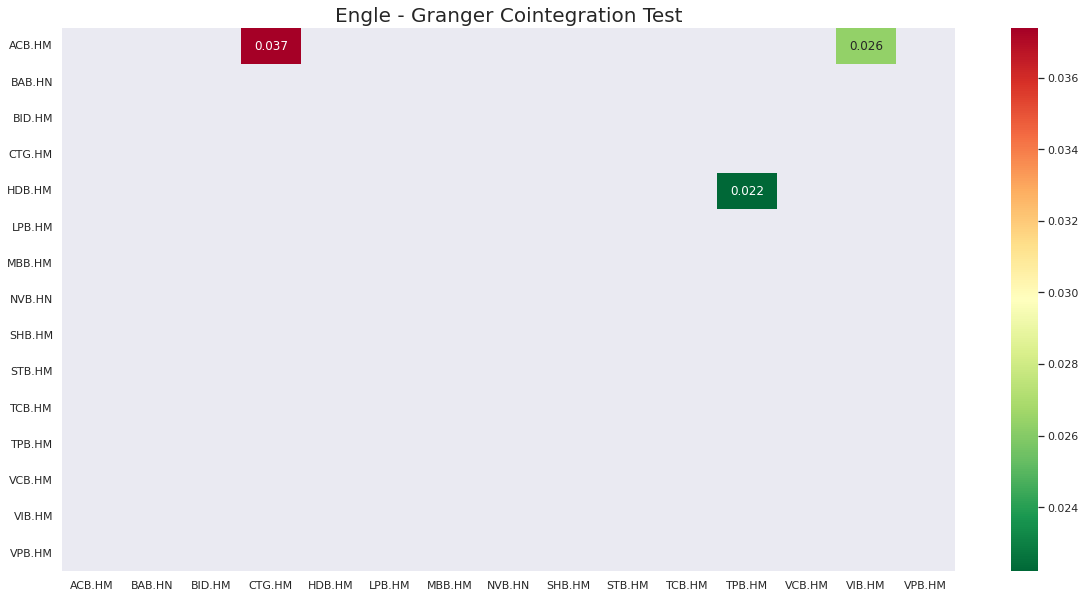

In [231]:
tickers = egjj_transformed_train_set.columns.tolist()

scores, pvalues, pairs = find_cointegrated_pairs(egjj_transformed_train_set)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05), annot=True
                )

plt.title('Engle - Granger Cointegration Test', fontsize = 20)
for element in pairs:
  print(element)

['ACB.HM', 'CTG.HM']
['ACB.HM', 'VIB.HM']
['BAB.HN', 'CTG.HM']
['BAB.HN', 'VPB.HM']
['HDB.HM', 'TPB.HM']
['SHB.HM', 'VPB.HM']
['VIB.HM', 'VPB.HM']


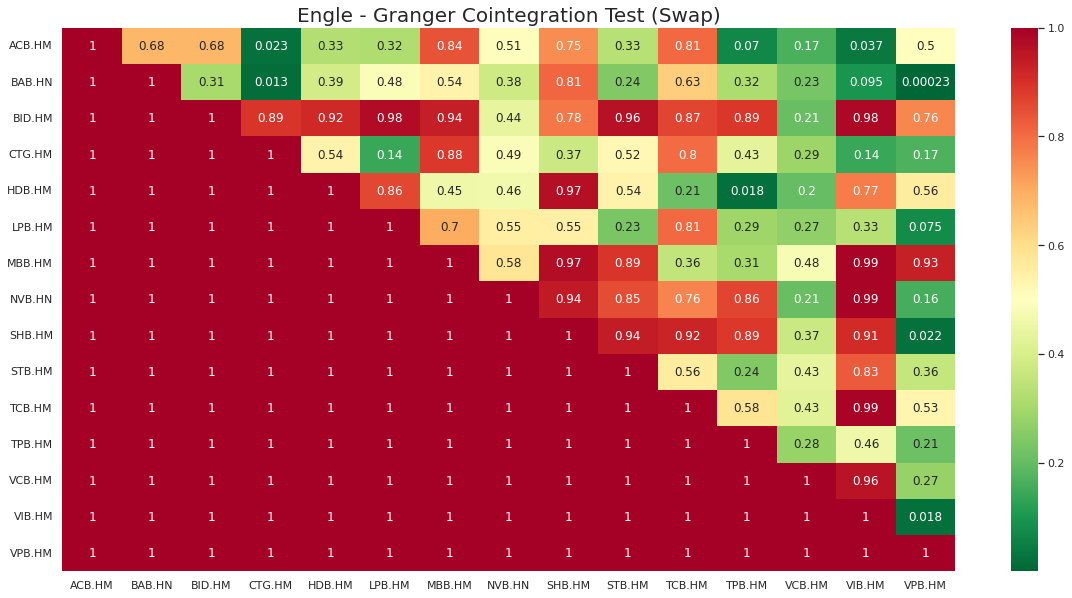

In [259]:
scores_swap, pvalues_swap, pairs_swap = find_cointegrated_pairs_swap(egjj_transformed_train_set)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pvalues_swap, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                # , mask = (pvalues >= 0.05)
                , 
            annot=True
                )

plt.title('Engle - Granger Cointegration Test (Swap)', fontsize = 20)
for element in pairs_swap:
  print(element)

In [233]:
all_pair = pairs.copy()
for e in pairs_swap:
  if e in all_pair or e[::-1] in all_pair:
    pass
  else:
    all_pair.append(e)

for i in all_pair:
  print(i)


len(all_pair)

['ACB.HM', 'CTG.HM']
['ACB.HM', 'VIB.HM']
['HDB.HM', 'TPB.HM']
['BAB.HN', 'CTG.HM']
['BAB.HN', 'VPB.HM']
['SHB.HM', 'VPB.HM']
['VIB.HM', 'VPB.HM']


7

### **Phương pháp Johansen Test** 

Reference: https://www.quantrocket.com/codeload/pairs-pipeline/pairs_pipeline/Part3-Pairs-Selection-Pipeline.ipynb.html 

In [234]:
all_pairs = list(itertools.combinations(egjj_transformed_train_set.columns.tolist(), 2))

print(f"formed {len(all_pairs)} total pairs")

formed 105 total pairs


According to Cheung and Lai (1993), if there are diverse results from the trace and max tests, then a preference will be given to the trace test. 
Ref: https://www.tandfonline.com/doi/pdf/10.1080/1331677X.2017.1340176 
https://www.researchgate.net/post/In_case_of_Johansen_Cointegration_test_what_to_do_when_Result_of_trace_test_and_Maximum_Eigenvalue_test_differs 

In [235]:
cointegrating_pairs= []
cointegration_pairs = []

for i, (sid_1, sid_2) in enumerate(all_pairs):
    
    pair_closes = egjj_transformed_train_set[[sid_1, sid_2]].dropna()

    # The second and third parameters indicate constant term, with a lag of 1. 
    # See Chan, Algorithmic Trading, chapter 2.
    result = coint_johansen(pair_closes, 0, 1)
    
    # the 90%, 95%, and 99% confidence levels for the trace statistic and maximum 
    # eigenvalue statistic are stored in the first, second, and third column of 
    # cvt and cvm, respectively
    confidence_level_cols = {
        90: 0,
        95: 1,
        99: 2
    }
    confidence_level_col = confidence_level_cols[95]
    
    trace_crit_value = result.cvt[:, confidence_level_col]
    eigen_crit_value = result.cvm[:, confidence_level_col]
    
    # The trace statistic and maximum eigenvalue statistic are stored in lr1 and lr2;
    # see if they exceeded the confidence threshold

    # if np.all(result.lr1[0] >= trace_crit_value[0]) and np.all(result.lr2[0] >= eigen_crit_value[0]):
    # not checking for eigenvalue

    if np.all(result.lr1[0] >= trace_crit_value[0]):
        
      cointegrating_pairs.append(dict(
            sid_1=sid_1,
            sid_2=sid_2
        ))
      cointegration_pairs.append([sid_1, sid_2])

In [236]:
cointegrating_pairs, len(cointegrating_pairs)

([{'sid_1': 'ACB.HM', 'sid_2': 'BAB.HN'},
  {'sid_1': 'BAB.HN', 'sid_2': 'CTG.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'LPB.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'TPB.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'VCB.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'VIB.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'VPB.HM'},
  {'sid_1': 'HDB.HM', 'sid_2': 'STB.HM'},
  {'sid_1': 'STB.HM', 'sid_2': 'TPB.HM'}],
 9)

In [237]:
cointegration_pairs, len(cointegration_pairs)

([['ACB.HM', 'BAB.HN'],
  ['BAB.HN', 'CTG.HM'],
  ['BAB.HN', 'LPB.HM'],
  ['BAB.HN', 'TPB.HM'],
  ['BAB.HN', 'VCB.HM'],
  ['BAB.HN', 'VIB.HM'],
  ['BAB.HN', 'VPB.HM'],
  ['HDB.HM', 'STB.HM'],
  ['STB.HM', 'TPB.HM']],
 9)

In [238]:
all_pairs_1 = list(itertools.combinations(transformed_train_set.columns.tolist(), 2))

print(f"formed {len(all_pairs_1)} total pairs")

formed 120 total pairs


In [239]:
cointegrating_pairs= []
cointegration_pairs = []

for i, (sid_1, sid_2) in enumerate(all_pairs_1):
    
    pair_closes = transformed_train_set[[sid_1, sid_2]].dropna()

    # The second and third parameters indicate constant term, with a lag of 1. 
    # See Chan, Algorithmic Trading, chapter 2.
    result = coint_johansen(pair_closes, 0, 1)
    
    # the 90%, 95%, and 99% confidence levels for the trace statistic and maximum 
    # eigenvalue statistic are stored in the first, second, and third column of 
    # cvt and cvm, respectively
    confidence_level_cols = {
        90: 0,
        95: 1,
        99: 2
    }
    confidence_level_col = confidence_level_cols[95]
    
    trace_crit_value = result.cvt[:, confidence_level_col]
    eigen_crit_value = result.cvm[:, confidence_level_col]
    
    # The trace statistic and maximum eigenvalue statistic are stored in lr1 and lr2;
    # see if they exceeded the confidence threshold

    # if np.all(result.lr1[0] >= trace_crit_value[0]) and np.all(result.lr2[0] >= eigen_crit_value[0]):
    # not checking for eigenvalue

    if np.all(result.lr1[0] >= trace_crit_value[0]):
        
      cointegrating_pairs.append(dict(
            sid_1=sid_1,
            sid_2=sid_2
        ))
      cointegration_pairs.append([sid_1, sid_2])

In [240]:
cointegration_pairs, len(cointegration_pairs)

([['ACB.HM', 'BAB.HN'],
  ['ACB.HM', 'EIB.HM'],
  ['BAB.HN', 'CTG.HM'],
  ['BAB.HN', 'EIB.HM'],
  ['BAB.HN', 'LPB.HM'],
  ['BAB.HN', 'TPB.HM'],
  ['BAB.HN', 'VCB.HM'],
  ['BAB.HN', 'VIB.HM'],
  ['BAB.HN', 'VPB.HM'],
  ['BID.HM', 'EIB.HM'],
  ['CTG.HM', 'EIB.HM'],
  ['EIB.HM', 'HDB.HM'],
  ['EIB.HM', 'LPB.HM'],
  ['EIB.HM', 'MBB.HM'],
  ['EIB.HM', 'NVB.HN'],
  ['EIB.HM', 'STB.HM'],
  ['EIB.HM', 'TCB.HM'],
  ['EIB.HM', 'TPB.HM'],
  ['EIB.HM', 'VCB.HM'],
  ['EIB.HM', 'VIB.HM'],
  ['EIB.HM', 'VPB.HM'],
  ['HDB.HM', 'STB.HM'],
  ['STB.HM', 'TPB.HM']],
 23)

# **Bounds Testing Procedure**

#### **Optimal Lag length and Model Specification Selection**

In [241]:
# stock_1 = 'HDB.HM'
# stock_2 = 'EIB.HM'

In [242]:
# max_lag_endog = int(np.log(len(transformed_train_set)))
# max_lag_exog = int(np.log(len(transformed_train_set)))

In [243]:
# sel_res_n = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="n")

# res_n = sel_res_n.model.fit()
# res_n.summary()
# res_n.summary()

In [244]:
# sel_res_c = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="c")

# res_c = sel_res_c.model.fit()
# res_c.summary()
# res_c.summary()

In [245]:
# sel_res_t = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="t")

# res_t = sel_res_t.model.fit()
# res_t.summary()
# res_t.summary()

In [246]:
# sel_res_ct = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="ct")

# res_ct = sel_res_ct.model.fit()
# res_ct.summary()
# res_ct.summary()

#### **Bounds Testing**

In [247]:
# lag_endog, lag_exog = 3,2

In [248]:
# ecm = UECM(transformed_train_set[[stock_1]], lag_endog, transformed_train_set[[stock_2]], lag_exog, trend="ct")
# ecm_fit = ecm.fit()
# bounds_test = ecm_fit.bounds_test(case=5)

# if bounds_test.stat >= bounds_test.crit_vals.iloc[1]['upper']:
#   print("There is cointegration relationship")
# else:
#   print("No relationship")

# **Test** 

In [249]:
fig = px.line(train_set,
              title='Stock Prices', 
              width=1400, height=800,
              )
# fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

In [250]:
fig = px.line(transformed_train_set,
              title='Transformed Stock Prices', 
              width=1400, height=800,
              )
# fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

In [251]:
#Ho: It is have unit root, non-stationary
#H1: It is stationary

def adfuller_test(input):
    result = adfuller(input)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    # labels = ['p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary \n")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [252]:
def calc_spread(col_combination):
  S1 = transformed_train_set[col_combination[0]]
  S2 = transformed_train_set[col_combination[1]]

  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[col_combination[0]]
  b = results.params[col_combination[0]]

  spread = S2 - b * S1
  return [spread,b, results.rsquared]

In [253]:
def plot_spread(col_combination):
  S1 = transformed_train_set[col_combination[0]]
  S2 = transformed_train_set[col_combination[1]]

  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[col_combination[0]]
  b = results.params[col_combination[0]]

  spread = S2 - b * S1
  spread.plot(figsize=(12,6))
  plt.axhline(spread.mean(), color='black')
  plt.legend(['Spread'])

In [254]:
col_combi = list(itertools.combinations(transformed_train_set.columns.tolist(), 2))

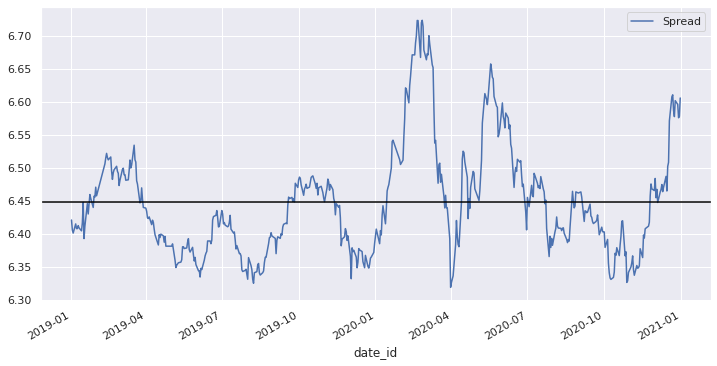

In [255]:
plot_spread(['VIB.HM', 'VPB.HM'])

In [256]:
adfuller_test(calc_spread(['VIB.HM', 'VPB.HM'])[0])
print(f"Coeff: {calc_spread(['VIB.HM', 'VPB.HM'])[1]}")
print(f"R-squared: {calc_spread(['VIB.HM', 'VPB.HM'])[2]}")

ADF Test Statistic : -3.6947869044126342
p-value : 0.004187081395900815
#Lags Used : 15
Number of Observations Used : 486
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

Coeff: 0.32776358975408637
R-squared: 0.5548137298684954


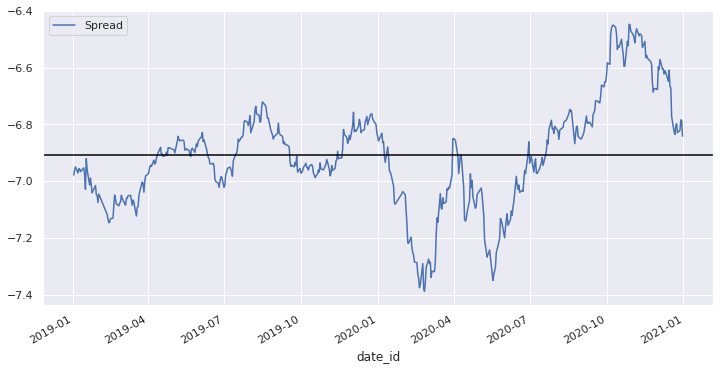

In [257]:
plot_spread(['VPB.HM','VIB.HM'])

In [258]:
adfuller_test(calc_spread(['VPB.HM','VIB.HM'])[0])
print(f"Coeff: {calc_spread(['VPB.HM','VIB.HM'])[1]}")
print(f"R-squared: {calc_spread(['VPB.HM','VIB.HM'])[2]}")

ADF Test Statistic : -2.826181683171451
p-value : 0.054630128271470436
#Lags Used : 16
Number of Observations Used : 485
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Coeff: 1.6927253276813483
R-squared: 0.5548137298684946
